In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

import os
import matplotlib.pyplot as plt

import sklearn
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from scipy.stats import zscore, pearsonr, uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV

from scipy.io import loadmat

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

# Datasets Upload

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Categorical Data Frame (Train)
path = '/content/drive/MyDrive/Data/TRAIN_CATEGORICAL_METADATA_new.csv'
categorical_train = pd.read_csv(path)
categorical_train.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,00aIpNTbG5uh,2019,4,1.0,0.0,3.0,21.0,45.0,NaN,NaN
1,00fV0OyyoLfw,2017,1,0.0,9.0,2.0,21.0,0.0,21.0,45.0
2,04X1eiS79T4B,2017,1,1.0,2.0,2.0,9.0,0.0,NaN,NaN
3,05ocQutkURd6,2018,1,3.0,8.0,2.0,18.0,10.0,18.0,0.0
4,06YUNBA9ZRLq,2018,1,0.0,1.0,2.0,12.0,0.0,NaN,NaN


In [ ]:
#Funtional Connectome Matrices Data Frame (Train)
path = '/content/drive/MyDrive/Data/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv'
fcm_train = pd.read_csv(path)
fcm_train.head()


,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.222930,0.527903,0.429966,0.060457,0.566489,0.315342,0.508408,-0.078290,0.525692,...,0.224985,0.397448,0.422966,0.184642,0.305549,0.420349,0.016328,0.561864,0.471170,0.365221
1,WHWymJu6zNZi,0.614765,0.577255,0.496127,0.496606,0.404686,0.439724,0.122590,-0.085452,0.120673,...,0.217546,-0.014549,0.000440,-0.096451,0.454501,0.343916,0.167313,0.607656,0.550623,0.503176
2,4PAQp1M6EyAo,-0.116833,0.458408,0.260703,0.639031,0.769337,0.442528,0.637110,0.192010,0.520379,...,0.342487,-0.021141,-0.037836,0.075069,0.412712,0.292708,0.391005,0.461544,0.508912,0.624232
3,obEacy4Of68I,0.199688,0.752714,0.658283,0.575096,0.692867,0.645789,0.522750,0.412188,0.530843,...,0.103562,-0.178313,0.210983,-0.018666,0.436313,0.592982,0.216205,0.341272,0.440313,0.558193
4,s7WzzDcmDOhF,0.227321,0.613268,0.621447,0.562673,0.736709,0.589813,0.266676,0.359668,0.300771,...,-0.164956,0.007064,-0.120904,-0.488095,0.493575,-0.215361,0.210685,0.055850,0.119065,0.108273


In [ ]:
#Quantitative Data Frame (Train)
quantitative_train = pd.read_csv('/content/drive/MyDrive/Data/TRAIN_QUANTITATIVE_METADATA_new.csv')
quantitative_train.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,00aIpNTbG5uh,100.00,13.0,3.0,15.0,44.0,14.0,20.0,27.0,3.0,17.0,4.0,11.0,5.0,8.0,6.0,2.0,9.0,14.274127
1,00fV0OyyoLfw,92.27,14.0,3.0,12.0,35.0,25.0,28.0,30.0,5.0,20.0,4.0,13.0,5.0,8.0,7.0,3.0,8.0,NaN
2,04X1eiS79T4B,86.67,14.0,3.0,21.0,37.0,18.0,26.0,28.0,3.0,24.0,7.0,10.0,10.0,7.0,14.0,7.0,7.0,13.463381
3,05ocQutkURd6,93.34,14.0,3.0,11.0,42.0,15.0,20.0,28.0,0.0,5.0,0.0,3.0,0.0,3.0,2.0,2.0,6.0,9.572553
4,06YUNBA9ZRLq,0.00,14.0,8.0,12.0,35.0,22.0,12.0,24.0,6.0,23.0,7.0,15.0,8.0,9.0,8.0,1.0,4.0,6.654574


In [ ]:
#Solutions Data Frame (Train)
solutions_train = pd.read_csv('/content/drive/MyDrive/Data/TRAINING_SOLUTIONS.csv')
solutions_train.head()

,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1


In [ ]:
#Categorical Data Frame (Test)
categorical_test = pd.read_csv('/content/drive/MyDrive/Data/TEST_CATEGORICAL.csv')
categorical_test.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,Cfwaf5FX7jWK,2022,4,0.0,0.0,4,21.0,30.0,18.0,30.0
1,vhGrzmvA3Hjq,2023,4,0.0,0.0,4,21.0,45.0,NaN,30.0
2,ULliyEXjy4OV,2022,4,0.0,0.0,4,21.0,40.0,18.0,40.0
3,LZfeAb1xMtql,2022,4,0.0,0.0,3,21.0,45.0,21.0,45.0
4,EnFOUv0YK1RG,2022,4,2.0,0.0,4,18.0,0.0,21.0,45.0


In [ ]:
#Functional Connectome Matrices (Test)
fcm_test = pd.read_csv('/content/drive/MyDrive/Data/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv')
fcm_test.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,Cfwaf5FX7jWK,0.548480,0.713607,0.557319,0.524369,0.693364,0.770032,0.724406,0.390118,0.547912,...,0.080423,-0.054581,-0.088163,-0.028574,0.444847,0.350149,-0.012601,0.665750,0.560565,0.555732
1,vhGrzmvA3Hjq,0.427740,0.363022,0.402862,0.363003,0.534558,0.345347,0.409471,0.303328,0.402515,...,0.198009,-0.000724,0.083122,0.033043,0.687497,0.306229,0.717485,0.461809,0.559632,0.350027
2,ULliyEXjy4OV,0.139572,0.390106,-0.087041,0.196852,0.088148,0.023843,0.381782,0.068979,0.377488,...,0.051319,0.023630,-0.056819,0.117396,0.576086,0.517831,0.527044,0.605038,0.609856,0.750987
3,LZfeAb1xMtql,0.133561,0.778326,0.416355,0.471840,0.568460,0.633660,0.501113,0.345461,0.467943,...,0.046183,-0.238962,0.121868,-0.260970,0.646818,0.594902,0.608156,0.595459,0.683189,0.542296
4,EnFOUv0YK1RG,0.126699,0.575446,0.509422,0.363193,0.427544,0.449924,0.451796,0.223927,0.298248,...,0.315734,0.002234,0.290791,0.344149,0.480214,0.539824,0.447322,0.293088,0.148529,0.539823


In [ ]:
#Quantitative Data Frame (Test)
quantitative_test = pd.read_csv('/content/drive/MyDrive/Data/TEST_QUANTITATIVE_METADATA.csv')
quantitative_test.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,Cfwaf5FX7jWK,60.03,14.0,5.0,16.0,41.0,19.0,11.0,26.0,2.0,12.0,3.0,9.0,2.0,7.0,3.0,0.0,8.0,8.992813
1,vhGrzmvA3Hjq,86.71,12.0,3.0,13.0,43.0,18.0,15.0,28.0,2.0,16.0,8.0,5.0,7.0,3.0,11.0,3.0,9.0,12.324093
2,ULliyEXjy4OV,26.68,13.0,3.0,14.0,36.0,16.0,14.0,25.0,1.0,7.0,1.0,6.0,1.0,5.0,1.0,0.0,9.0,7.770933
3,LZfeAb1xMtql,93.38,13.0,3.0,19.0,41.0,17.0,18.0,27.0,4.0,15.0,4.0,10.0,8.0,6.0,5.0,1.0,6.0,9.304814
4,EnFOUv0YK1RG,-93.38,14.0,3.0,13.0,42.0,19.0,16.0,28.0,2.0,18.0,6.0,12.0,5.0,10.0,6.0,0.0,10.0,8.261350


# Exploratory Data Analysis (EDA)

In [ ]:
#Looking into the Categorical Train Set
categorical_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1170 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1159 non-null   float64
 5   MRI_Track_Scan_Location           1210 non-null   float64
 6   Barratt_Barratt_P1_Edu            1198 non-null   float64
 7   Barratt_Barratt_P1_Occ            1182 non-null   float64
 8   Barratt_Barratt_P2_Edu            1015 non-null   float64
 9   Barratt_Barratt_P2_Occ            991 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 94.9+ KB


In [ ]:
#Sneak Peek into the Categorical Train Set
categorical_train.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,00aIpNTbG5uh,2019,4,1.0,0.0,3.0,21.0,45.0,NaN,NaN
1,00fV0OyyoLfw,2017,1,0.0,9.0,2.0,21.0,0.0,21.0,45.0
2,04X1eiS79T4B,2017,1,1.0,2.0,2.0,9.0,0.0,NaN,NaN
3,05ocQutkURd6,2018,1,3.0,8.0,2.0,18.0,10.0,18.0,0.0
4,06YUNBA9ZRLq,2018,1,0.0,1.0,2.0,12.0,0.0,NaN,NaN


In [ ]:
#Looking into Value Counts
categorical_cols = [
    'Basic_Demos_Enroll_Year',
    'Basic_Demos_Study_Site',
    'PreInt_Demos_Fam_Child_Ethnicity',
    'PreInt_Demos_Fam_Child_Race',
    'MRI_Track_Scan_Location',
    'Barratt_Barratt_P1_Edu',
    'Barratt_Barratt_P1_Occ',
    'Barratt_Barratt_P2_Edu',
    'Barratt_Barratt_P2_Occ'
]

for col in categorical_cols:
    print(f"\n--- {col} ---")
    print(categorical_train[col].value_counts(dropna=False))



--- Basic_Demos_Enroll_Year ---
Basic_Demos_Enroll_Year
2018    415
2019    312
2017    254
2016    191
2015     36
2020      5
Name: count, dtype: int64

--- Basic_Demos_Study_Site ---
Basic_Demos_Study_Site
1    652
3    430
4    120
2     11
Name: count, dtype: int64

--- PreInt_Demos_Fam_Child_Ethnicity ---
PreInt_Demos_Fam_Child_Ethnicity
0.0    777
1.0    296
2.0     77
NaN     43
3.0     20
Name: count, dtype: int64

--- PreInt_Demos_Fam_Child_Race ---
PreInt_Demos_Fam_Child_Race
0.0     573
8.0     195
1.0     181
2.0     128
NaN      54
3.0      30
9.0      23
10.0     11
4.0      10
11.0      6
7.0       2
Name: count, dtype: int64

--- MRI_Track_Scan_Location ---
MRI_Track_Scan_Location
2.0    532
3.0    463
1.0    179
4.0     36
NaN      3
Name: count, dtype: int64

--- Barratt_Barratt_P1_Edu ---
Barratt_Barratt_P1_Edu
21.0    470
18.0    421
15.0    162
12.0     97
9.0      28
NaN      15
6.0      15
3.0       5
Name: count, dtype: int64

--- Barratt_Barratt_P1_Occ ---
Ba

In [ ]:
#We can see from the output of the previous cell, for the categorical train set we have some columns with substantial null values

<ipython-input-15-c52aa40fff24>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical_train, x=col, palette='viridis', order=categorical_train[col].value_counts().index)
<ipython-input-15-c52aa40fff24>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical_train, x=col, palette='viridis', order=categorical_train[col].value_counts().index)
<ipython-input-15-c52aa40fff24>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=categorical_train, x=col, palette='viridis', order=categorical_train[col].value_counts()

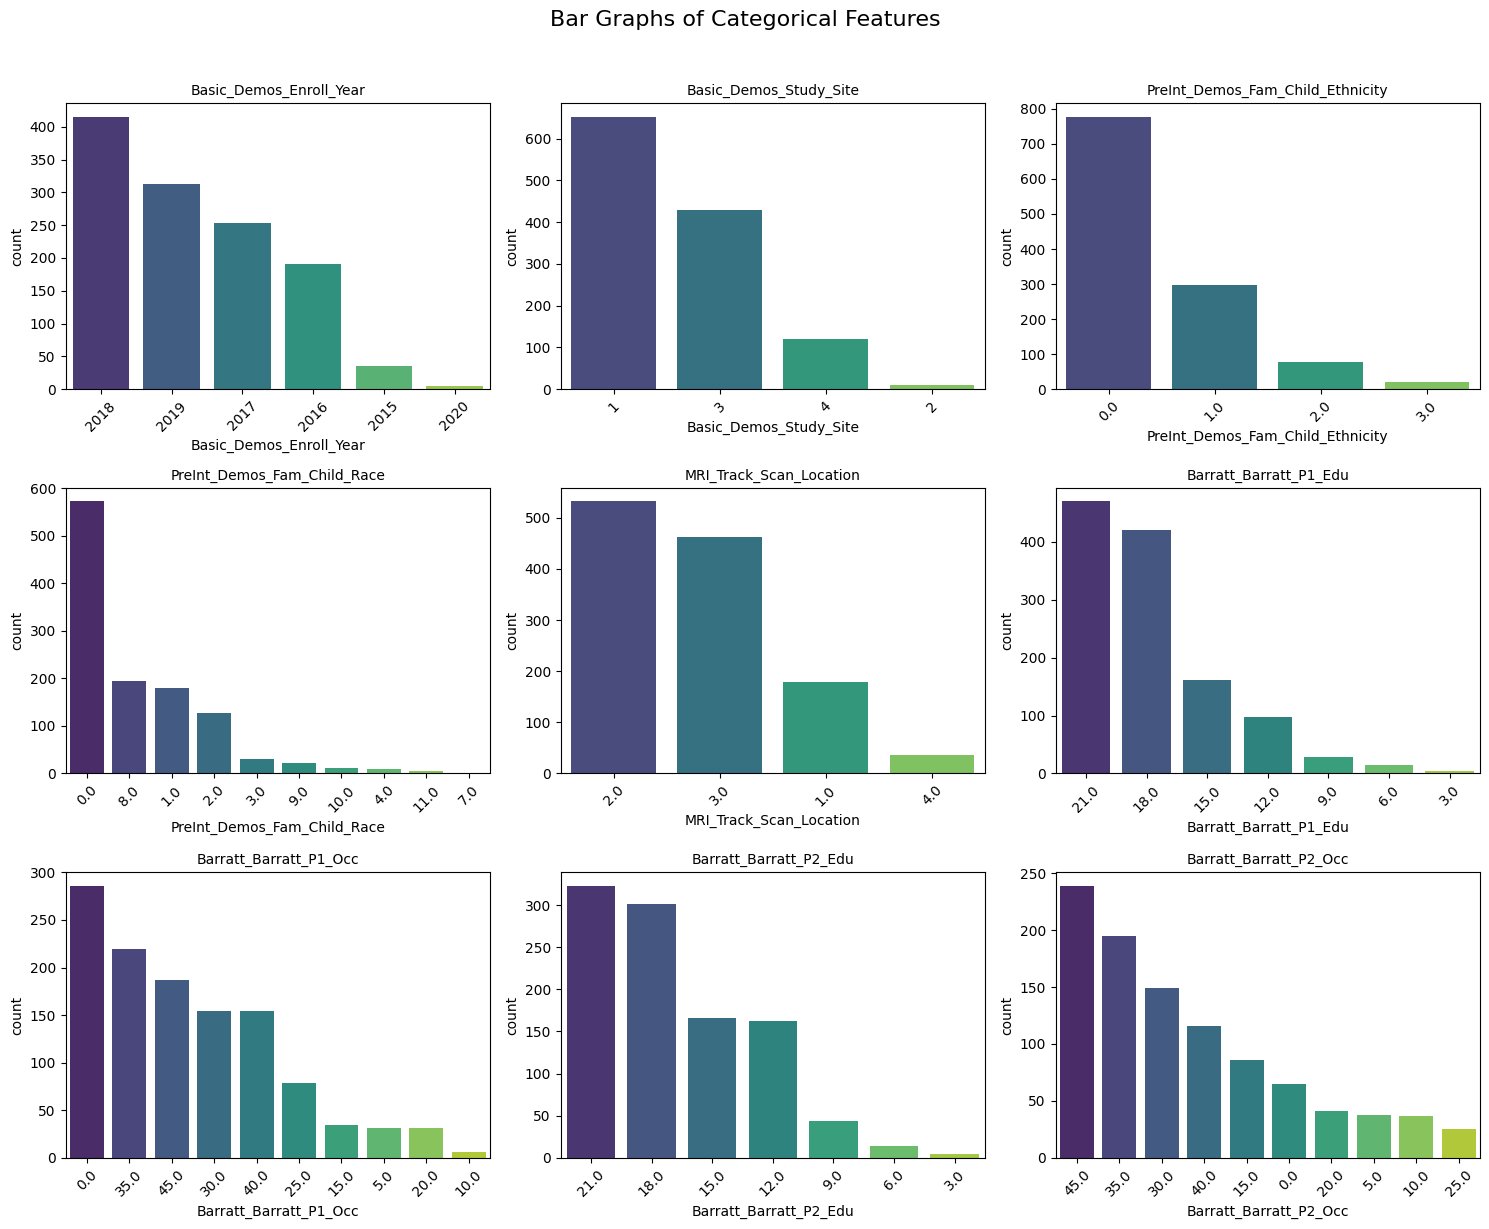

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Columns to plot (excluding ID)
cols_to_plot = [col for col in categorical_train.columns if col != 'participant_id']

# Set number of columns/rows in the grid
n_cols = 3
n_rows = math.ceil(len(cols_to_plot) / n_cols)

# Set plot size
plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=categorical_train, x=col, palette='viridis', order=categorical_train[col].value_counts().index)
    plt.title(col, fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.suptitle("Bar Graphs of Categorical Features", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


In [ ]:
#Add ADHD Outcome to check correlation
categorical_train_copy = categorical_train.copy()
categorical_train_copy['ADHD_Outcome'] = solutions_train['ADHD_Outcome']
categorical_train_copy.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,ADHD_Outcome
0,00aIpNTbG5uh,2019,4,1.0,0.0,3.0,21.0,45.0,NaN,NaN,1
1,00fV0OyyoLfw,2017,1,0.0,9.0,2.0,21.0,0.0,21.0,45.0,1
2,04X1eiS79T4B,2017,1,1.0,2.0,2.0,9.0,0.0,NaN,NaN,1
3,05ocQutkURd6,2018,1,3.0,8.0,2.0,18.0,10.0,18.0,0.0,1
4,06YUNBA9ZRLq,2018,1,0.0,1.0,2.0,12.0,0.0,NaN,NaN,1


In [ ]:
#Checking value counts of ADHD Outcome
categorical_train_copy['ADHD_Outcome'].value_counts()

,count
ADHD_Outcome,
1,831
0,382


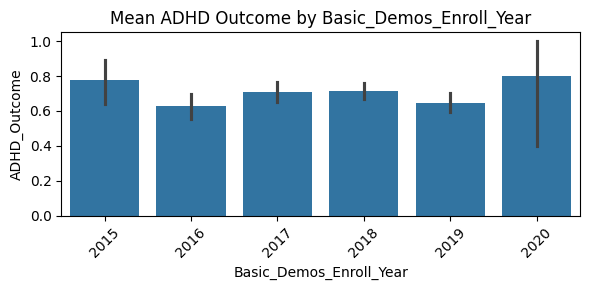

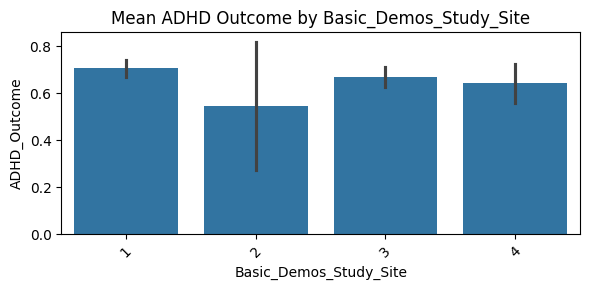

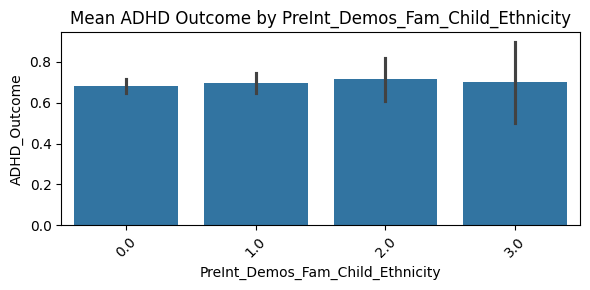

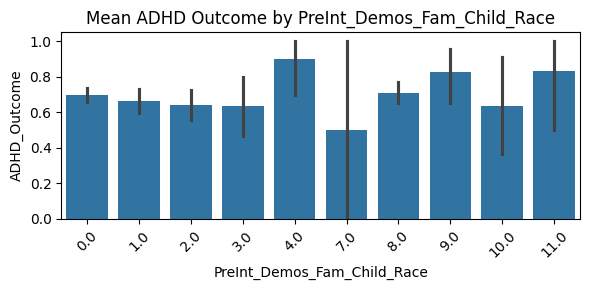

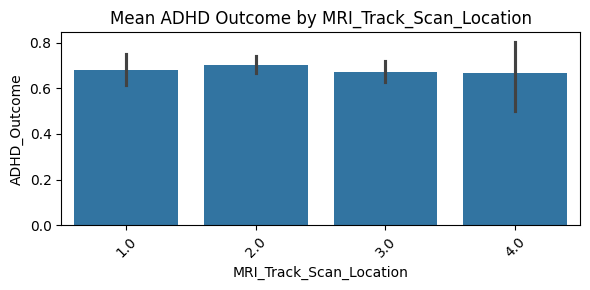

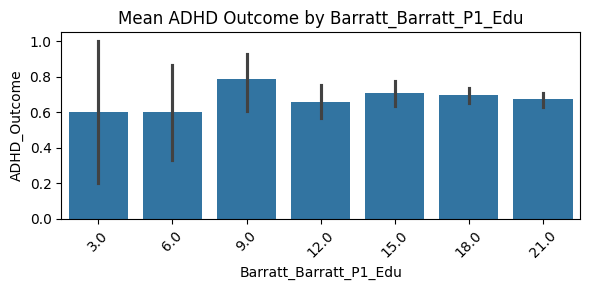

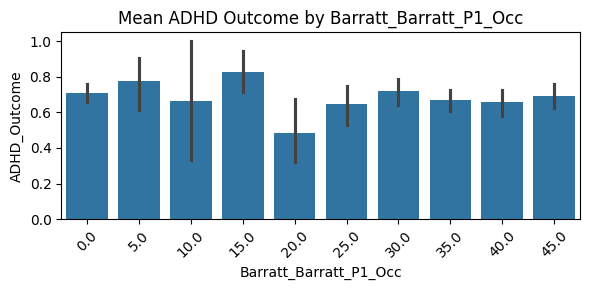

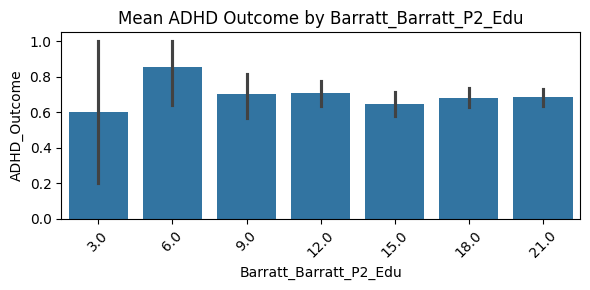

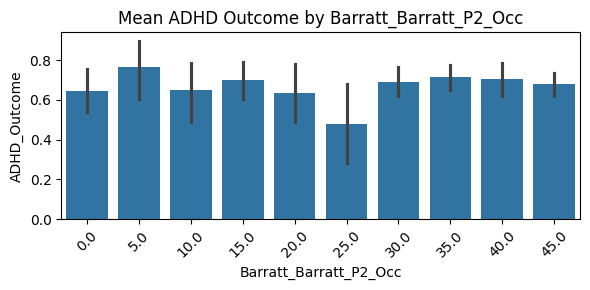

In [ ]:
#Looking into the probability of having ADHD according to the categories of each column

for col in categorical_train_copy.columns:
    if col != 'ADHD_Outcome' and col != 'participant_id':
        plt.figure(figsize=(6, 3))
        sns.barplot(x=col, y='ADHD_Outcome', data=categorical_train_copy, estimator='mean')
        plt.title(f"Mean ADHD Outcome by {col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


In [ ]:
#Looking into the Quantitative Train Set
quantitative_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   participant_id              1213 non-null   object 
 1   EHQ_EHQ_Total               1200 non-null   float64
 2   ColorVision_CV_Score        1190 non-null   float64
 3   APQ_P_APQ_P_CP              1201 non-null   float64
 4   APQ_P_APQ_P_ID              1201 non-null   float64
 5   APQ_P_APQ_P_INV             1201 non-null   float64
 6   APQ_P_APQ_P_OPD             1201 non-null   float64
 7   APQ_P_APQ_P_PM              1201 non-null   float64
 8   APQ_P_APQ_P_PP              1201 non-null   float64
 9   SDQ_SDQ_Conduct_Problems    1204 non-null   float64
 10  SDQ_SDQ_Difficulties_Total  1204 non-null   float64
 11  SDQ_SDQ_Emotional_Problems  1204 non-null   float64
 12  SDQ_SDQ_Externalizing       1204 non-null   float64
 13  SDQ_SDQ_Generating_Impact   1204 

In [ ]:
#Sneak Peek into the Quantitative Train Set
quantitative_train.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,00aIpNTbG5uh,100.00,13.0,3.0,15.0,44.0,14.0,20.0,27.0,3.0,17.0,4.0,11.0,5.0,8.0,6.0,2.0,9.0,14.274127
1,00fV0OyyoLfw,92.27,14.0,3.0,12.0,35.0,25.0,28.0,30.0,5.0,20.0,4.0,13.0,5.0,8.0,7.0,3.0,8.0,NaN
2,04X1eiS79T4B,86.67,14.0,3.0,21.0,37.0,18.0,26.0,28.0,3.0,24.0,7.0,10.0,10.0,7.0,14.0,7.0,7.0,13.463381
3,05ocQutkURd6,93.34,14.0,3.0,11.0,42.0,15.0,20.0,28.0,0.0,5.0,0.0,3.0,0.0,3.0,2.0,2.0,6.0,9.572553
4,06YUNBA9ZRLq,0.00,14.0,8.0,12.0,35.0,22.0,12.0,24.0,6.0,23.0,7.0,15.0,8.0,9.0,8.0,1.0,4.0,6.654574


In [ ]:
#Looking into the value counts for this dataframe
for col in quantitative_train.columns:
    if col != 'participant_id':
        print(f"\n--- Value Counts for: {col} ---")
        print(quantitative_train[col].value_counts(dropna=False).sort_index())


--- Value Counts for: EHQ_EHQ_Total ---
EHQ_EHQ_Total
-100.00     16
-97.80       2
-96.67       1
-94.47       1
-93.34       5
          ... 
 95.60       7
 96.67      18
 97.80      14
 100.00    252
 NaN        13
Name: count, Length: 159, dtype: int64

--- Value Counts for: ColorVision_CV_Score ---
ColorVision_CV_Score
0.0       6
1.0      10
2.0       8
3.0       4
4.0       2
5.0       4
6.0       2
8.0       3
9.0       2
10.0      5
11.0      8
12.0     26
13.0    141
14.0    969
NaN      23
Name: count, dtype: int64

--- Value Counts for: APQ_P_APQ_P_CP ---
APQ_P_APQ_P_CP
2.0       3
3.0     740
4.0     177
5.0     154
6.0      54
7.0      42
8.0      18
9.0      11
10.0      1
12.0      1
NaN      12
Name: count, dtype: int64

--- Value Counts for: APQ_P_APQ_P_ID ---
APQ_P_APQ_P_ID
5.0       1
6.0      31
7.0      21
8.0      58
9.0      79
10.0     94
11.0     89
12.0    122
13.0    129
14.0    133
15.0    104
16.0    115
17.0     66
18.0     71
19.0     34
20.0     25
21

In [ ]:
#From the output of the previous cell, we can see that many of the columns contain null values that will need to be handled

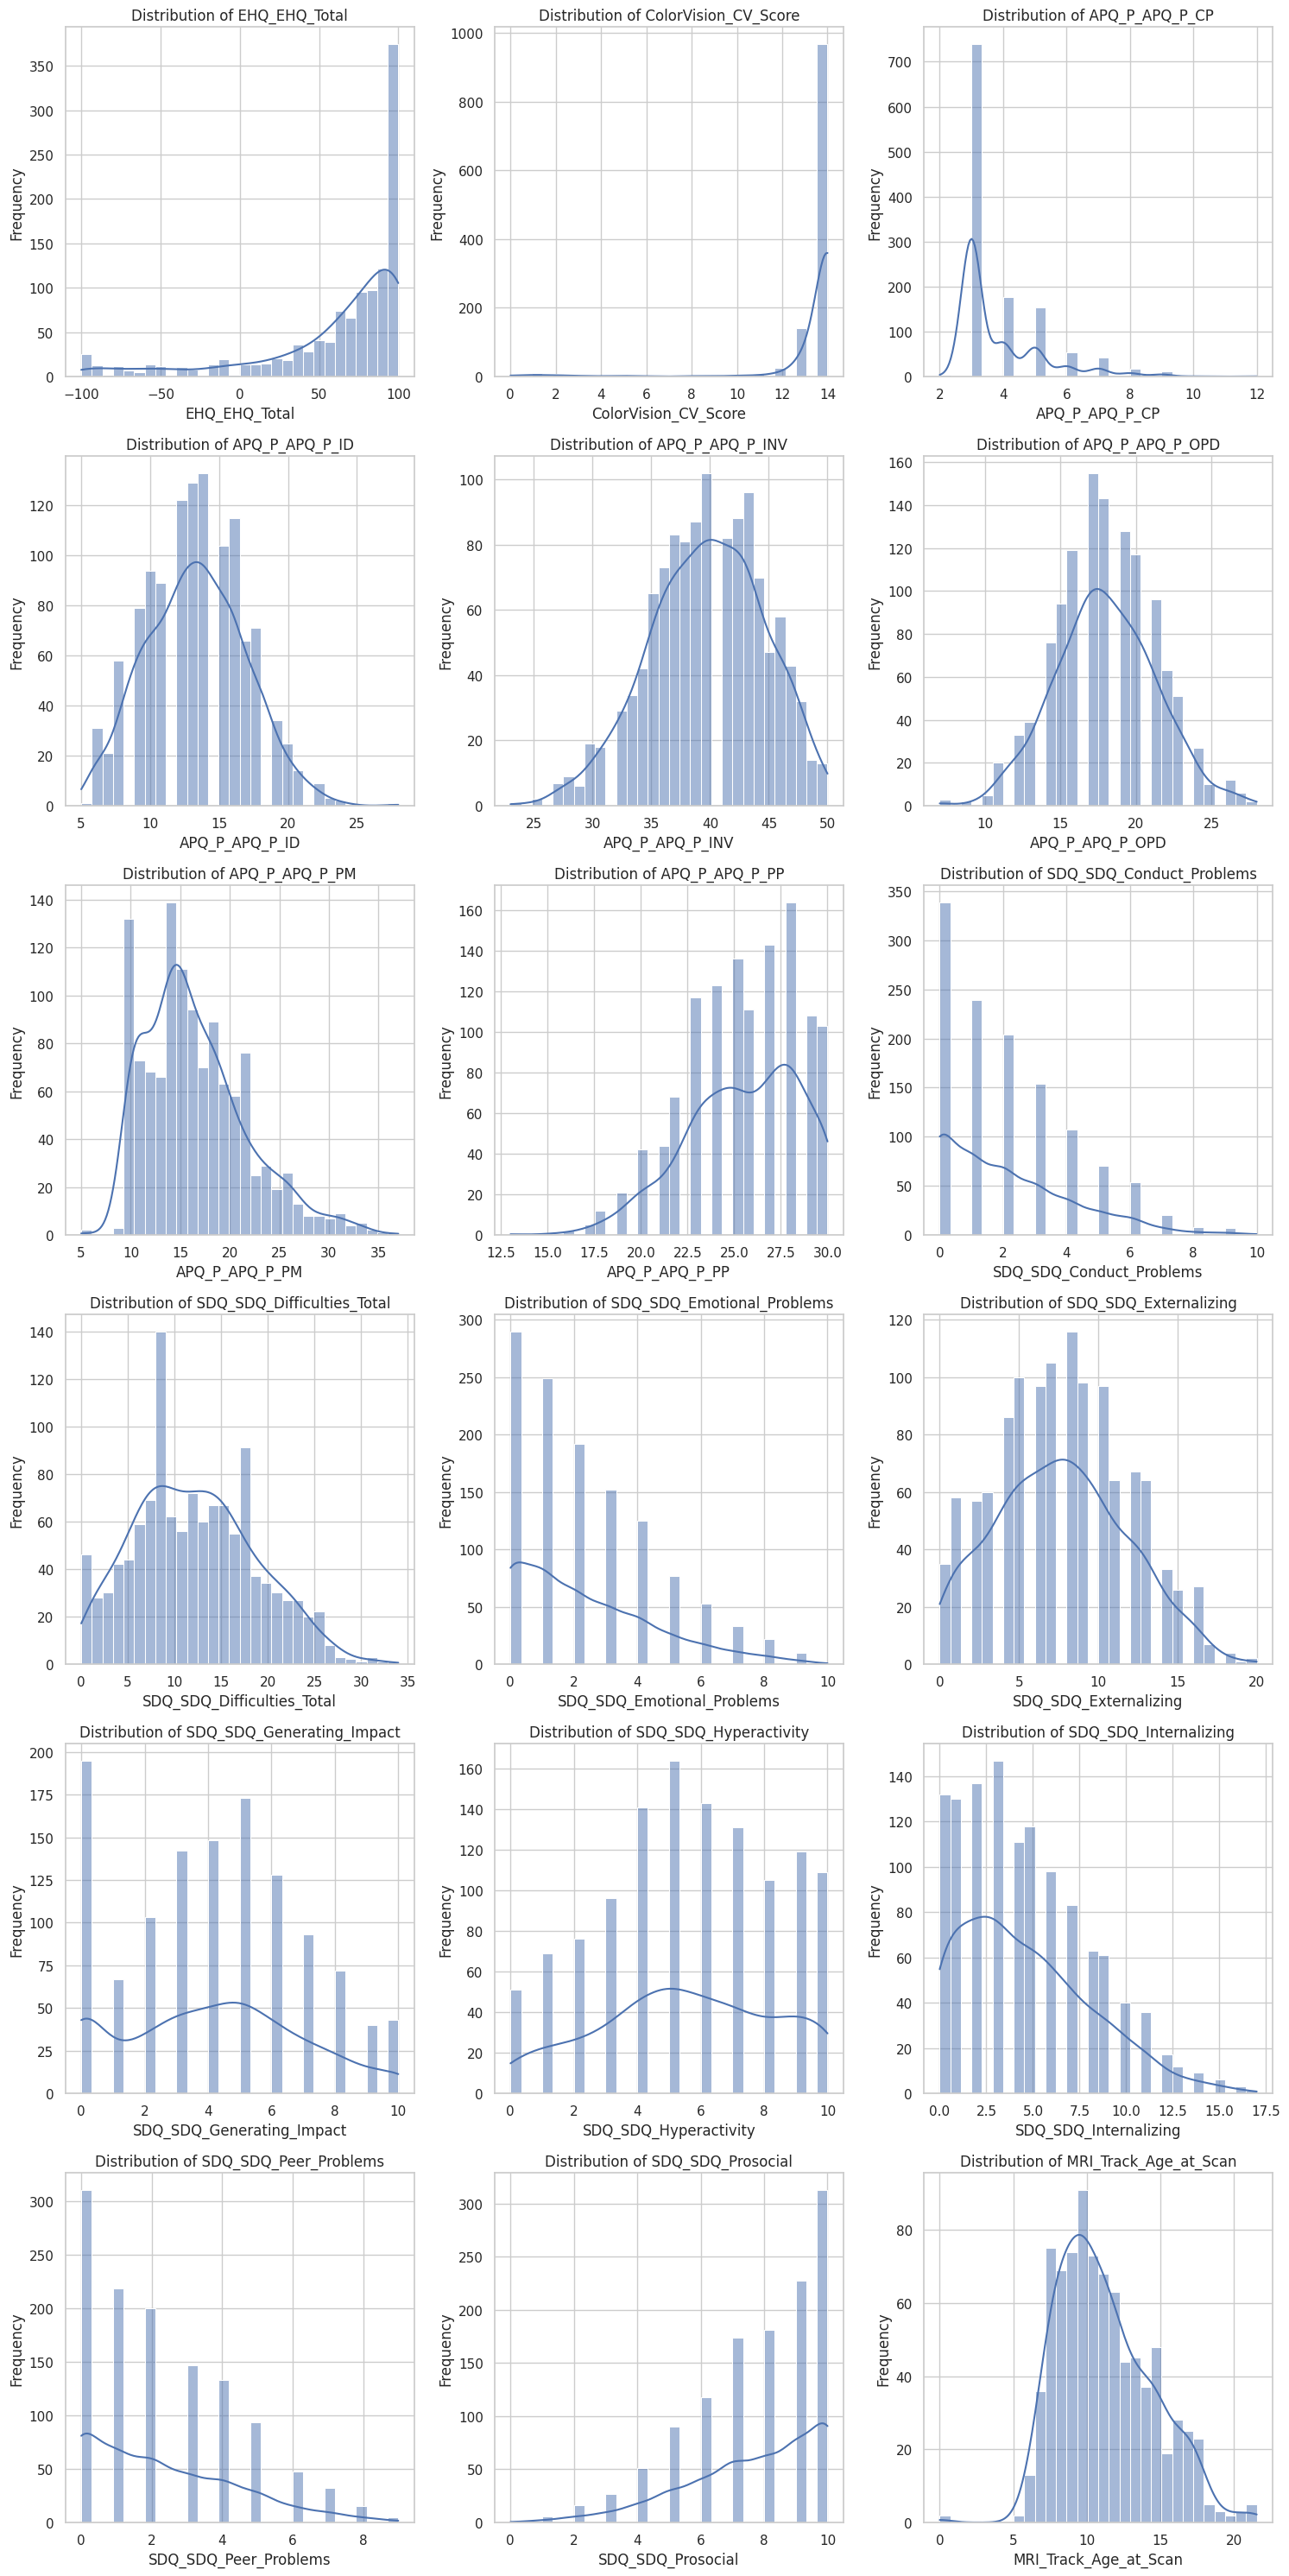

In [ ]:
#Plotting the distributions of each column in the Quantitative Dataset
sns.set(style="whitegrid")

num_columns = len(quantitative_test.columns) - 1
num_rows = int(np.ceil(num_columns / 3))

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

axes = axes.flatten()

plot_idx = 0
for col in quantitative_train.columns:
    if col != 'participant_id':
        ax = axes[plot_idx]
        if quantitative_train[col].dtype in ['int64', 'float64']:
            sns.histplot(quantitative_train[col], kde=True, bins=30, ax=ax)
            ax.set_title(f"Distribution of {col}")
            ax.set_xlabel(col)
            ax.set_ylabel("Frequency")
        else:
            sns.countplot(y=quantitative_test[col], order=quantitative_train[col].value_counts().index, ax=ax)
            ax.set_title(f"Count distribution of {col}")
            ax.set_xlabel("Count")
            ax.set_ylabel(col)

        plot_idx += 1

for i in range(plot_idx, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
#Add ADHD Outcome to check correlation
quantitative_train_copy = quantitative_train.copy()
quantitative_train_copy['ADHD_Outcome'] = solutions_train['ADHD_Outcome']
quantitative_train_copy.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan,ADHD_Outcome
0,00aIpNTbG5uh,100.00,13.0,3.0,15.0,44.0,14.0,20.0,27.0,3.0,17.0,4.0,11.0,5.0,8.0,6.0,2.0,9.0,14.274127,1
1,00fV0OyyoLfw,92.27,14.0,3.0,12.0,35.0,25.0,28.0,30.0,5.0,20.0,4.0,13.0,5.0,8.0,7.0,3.0,8.0,NaN,1
2,04X1eiS79T4B,86.67,14.0,3.0,21.0,37.0,18.0,26.0,28.0,3.0,24.0,7.0,10.0,10.0,7.0,14.0,7.0,7.0,13.463381,1
3,05ocQutkURd6,93.34,14.0,3.0,11.0,42.0,15.0,20.0,28.0,0.0,5.0,0.0,3.0,0.0,3.0,2.0,2.0,6.0,9.572553,1
4,06YUNBA9ZRLq,0.00,14.0,8.0,12.0,35.0,22.0,12.0,24.0,6.0,23.0,7.0,15.0,8.0,9.0,8.0,1.0,4.0,6.654574,1


In [ ]:
#Check value counts of the added ADHD Outcome column
quantitative_train_copy['ADHD_Outcome'].value_counts()

,count
ADHD_Outcome,
1,831
0,382


In [ ]:
#Looking into the probability of having ADHD according to the categories of each column

for col in quantitative_train_copy.columns:
    if col != 'ADHD_Outcome' and col != 'participant_id':
        adhd_percentages = quantitative_train_copy.groupby(col)['ADHD_Outcome'].mean()

        print(f"--- ADHD Outcome Mean by {col} ---")
        print(adhd_percentages)
        print("\n")


--- ADHD Outcome Mean by EHQ_EHQ_Total ---
EHQ_EHQ_Total
-100.00    0.562500
-97.80     1.000000
-96.67     1.000000
-94.47     1.000000
-93.34     0.600000
             ...   
 94.47     0.666667
 95.60     0.428571
 96.67     0.833333
 97.80     0.642857
 100.00    0.670635
Name: ADHD_Outcome, Length: 158, dtype: float64


--- ADHD Outcome Mean by ColorVision_CV_Score ---
ColorVision_CV_Score
0.0     0.666667
1.0     0.600000
2.0     0.750000
3.0     1.000000
4.0     0.500000
5.0     0.250000
6.0     0.500000
8.0     0.333333
9.0     1.000000
10.0    1.000000
11.0    0.625000
12.0    0.807692
13.0    0.638298
14.0    0.688338
Name: ADHD_Outcome, dtype: float64


--- ADHD Outcome Mean by APQ_P_APQ_P_CP ---
APQ_P_APQ_P_CP
2.0     1.000000
3.0     0.682432
4.0     0.711864
5.0     0.662338
6.0     0.648148
7.0     0.809524
8.0     0.666667
9.0     0.454545
10.0    1.000000
12.0    1.000000
Name: ADHD_Outcome, dtype: float64


--- ADHD Outcome Mean by APQ_P_APQ_P_ID ---
APQ_P_APQ_P_ID
5.

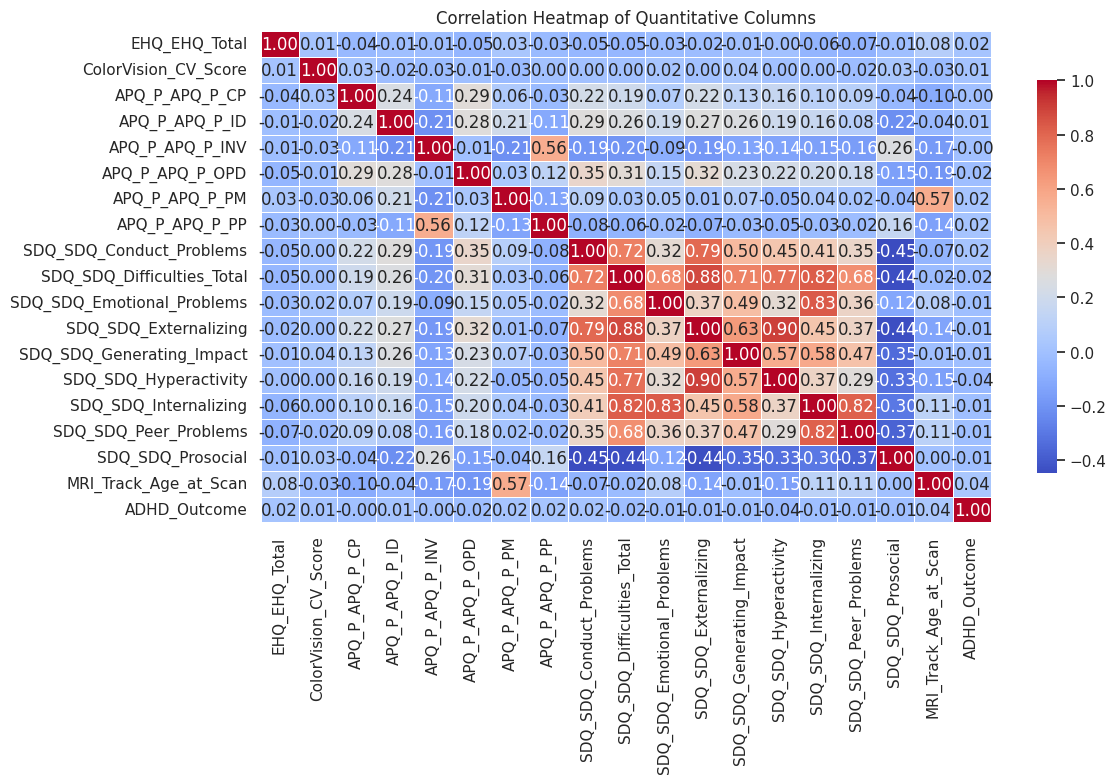

In [ ]:
#Looking into the correlation of columns with each other in the Quantitative Train Set

quantitative_train_copy_clean = quantitative_train_copy.drop(columns=['participant_id'])

numeric_columns = quantitative_train_copy_clean.select_dtypes(include=['number']).columns

correlation_matrix = quantitative_train_copy_clean[numeric_columns].corr()

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': .8})

plt.title("Correlation Heatmap of Quantitative Columns")
plt.tight_layout()

plt.show()


In [ ]:
#Looking into the Solutions Train Set
solutions_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   participant_id  1213 non-null   object
 1   ADHD_Outcome    1213 non-null   int64 
 2   Sex_F           1213 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 28.6+ KB


In [ ]:
#Sneak Peak into the Solutions Train Set
solutions_train.head()

,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1


<ipython-input-29-7363df1a20a2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=solutions_train, palette='Set2')


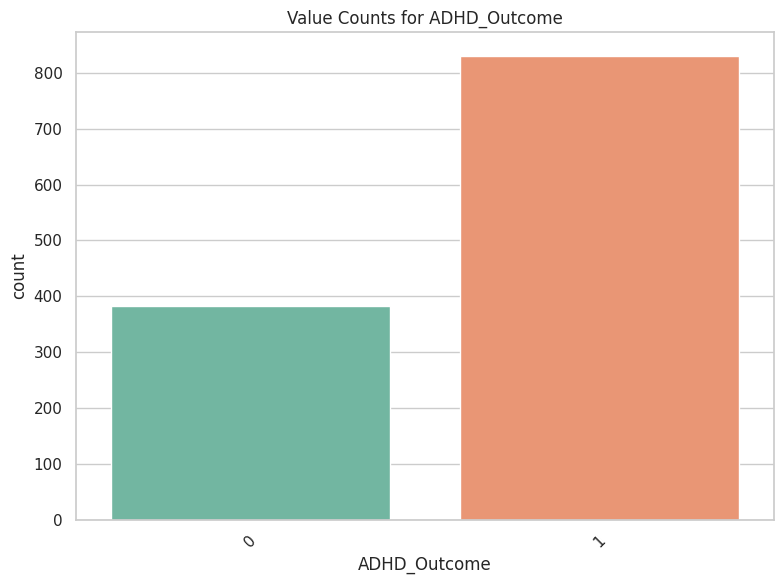

<ipython-input-29-7363df1a20a2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=solutions_train, palette='Set2')


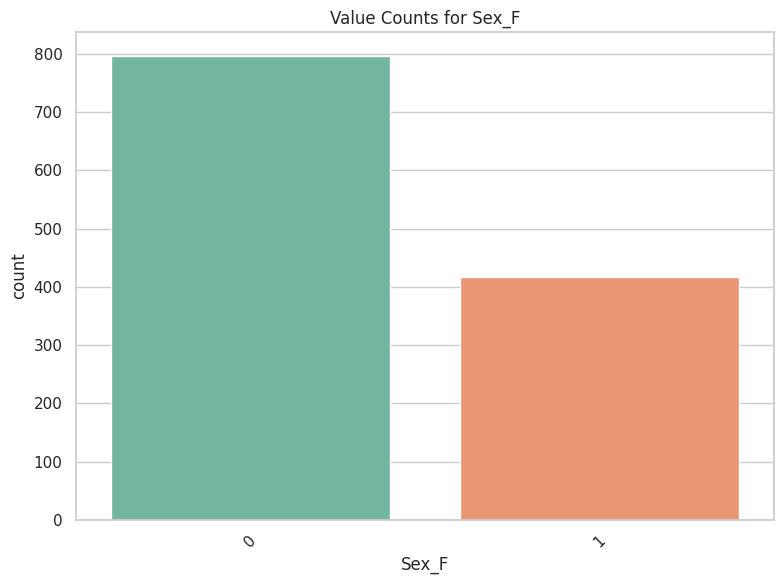

In [ ]:
#Plotting the distributions of the columns in the Solutions Train Set

for col in solutions_train.columns:
    if col != 'participant_id':
        plt.figure(figsize=(8, 6))
        sns.countplot(x=col, data=solutions_train, palette='Set2')
        plt.title(f"Value Counts for {col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


In [ ]:
#Checking the Value Counts of the columns in the Solutions Train Set
for col in solutions_train.columns:
    if col != 'participant_id':
        print(f"\n--- Value Counts for {col} ---")
        print(solutions_train[col].value_counts(dropna=False))
        print("\n")



--- Value Counts for ADHD_Outcome ---
ADHD_Outcome
1    831
0    382
Name: count, dtype: int64



--- Value Counts for Sex_F ---
Sex_F
0    797
1    416
Name: count, dtype: int64




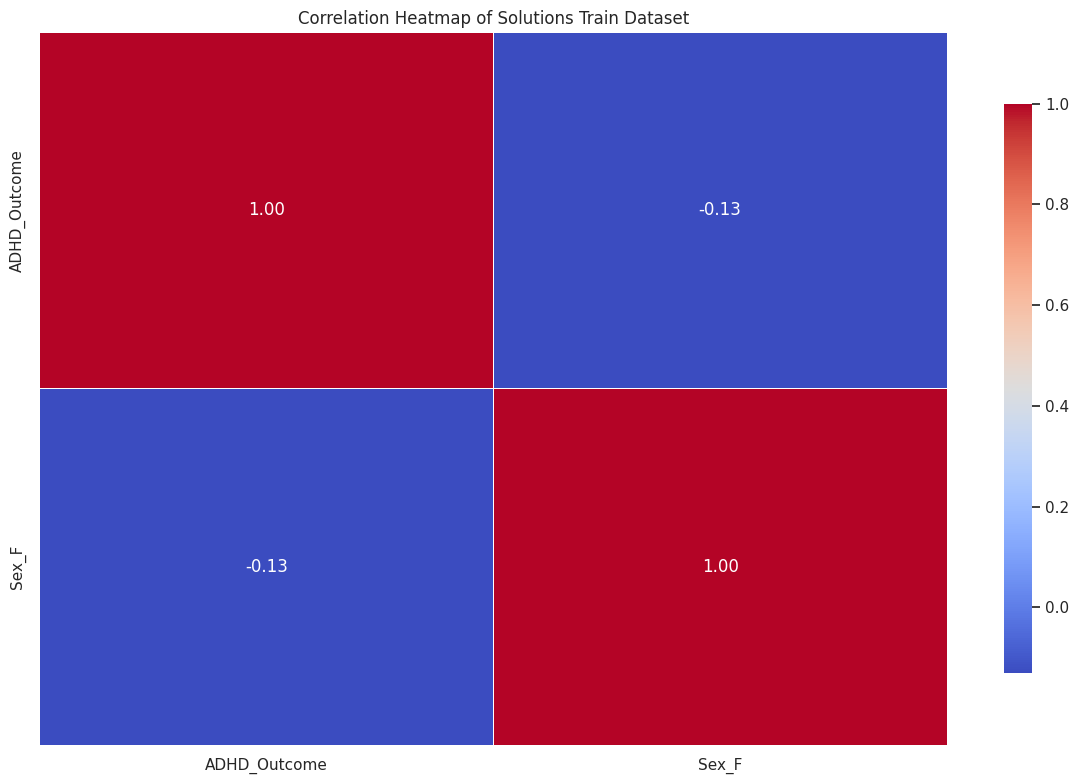

In [ ]:
#Checking correlation between the columns in the Solutions Train Set

solutions_train_clean = solutions_train.drop(columns=['participant_id'], errors='ignore')

numeric_columns = solutions_train_clean.select_dtypes(include=['number']).columns

correlation_matrix = solutions_train_clean[numeric_columns].corr()

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': .8})

plt.title("Correlation Heatmap of Solutions Train Dataset")
plt.tight_layout()

plt.show()


# Pre-Processing

In [ ]:
#Fill missing entries with mode for the Categorical Dataset (Train)
for col in categorical_train.columns[1:]:  # skip participant_id
    categorical_train[col] = categorical_train[col].fillna(categorical_train[col].mode()[0])

In [ ]:
#Convert all integer columns to category type for the Categorical Dataset (Train)
for col in categorical_train.select_dtypes(include='int').columns:
    categorical_train[col] = categorical_train[col].astype('category')
for col in categorical_train.select_dtypes(include='float').columns:
    categorical_train[col] = categorical_train[col].astype('category')
categorical_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   participant_id                    1213 non-null   object  
 1   Basic_Demos_Enroll_Year           1213 non-null   category
 2   Basic_Demos_Study_Site            1213 non-null   category
 3   PreInt_Demos_Fam_Child_Ethnicity  1213 non-null   category
 4   PreInt_Demos_Fam_Child_Race       1213 non-null   category
 5   MRI_Track_Scan_Location           1213 non-null   category
 6   Barratt_Barratt_P1_Edu            1213 non-null   category
 7   Barratt_Barratt_P1_Occ            1213 non-null   category
 8   Barratt_Barratt_P2_Edu            1213 non-null   category
 9   Barratt_Barratt_P2_Occ            1213 non-null   category
dtypes: category(9), object(1)
memory usage: 22.9+ KB


In [ ]:
#Displaying columns for encoding in the Categorical Dataset (Train)
columns_to_encode = categorical_train.columns[1:].tolist()

print("Columns to encode:", columns_to_encode)


Columns to encode: ['Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ']


In [ ]:
#Encoding the Categorical Dataset (Train)
train_encoded = pd.get_dummies(categorical_train[columns_to_encode], drop_first=True)
train_encoded = train_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))

<ipython-input-13-15d77512d302>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train_encoded = train_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))


In [ ]:
# Combine encoded columns with the rest of the DataFrame
cat_train_final = pd.concat([categorical_train['participant_id'], train_encoded], axis=1)

# ensure it looks correct
cat_train_final.head()

,participant_id,Basic_Demos_Enroll_Year_2016,Basic_Demos_Enroll_Year_2017,Basic_Demos_Enroll_Year_2018,Basic_Demos_Enroll_Year_2019,Basic_Demos_Enroll_Year_2020,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4,PreInt_Demos_Fam_Child_Ethnicity_1.0,...,Barratt_Barratt_P2_Edu_21.0,Barratt_Barratt_P2_Occ_5.0,Barratt_Barratt_P2_Occ_10.0,Barratt_Barratt_P2_Occ_15.0,Barratt_Barratt_P2_Occ_20.0,Barratt_Barratt_P2_Occ_25.0,Barratt_Barratt_P2_Occ_30.0,Barratt_Barratt_P2_Occ_35.0,Barratt_Barratt_P2_Occ_40.0,Barratt_Barratt_P2_Occ_45.0
0,00aIpNTbG5uh,0,0,0,1,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,1
1,00fV0OyyoLfw,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,04X1eiS79T4B,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,05ocQutkURd6,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,06YUNBA9ZRLq,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
#Handle missing in FCM Dataset (Train)
for col in fcm_train.columns[1:]:
    fcm_train[col] = fcm_train[col].fillna(0)

scaler = StandardScaler()

# Fit on all columns except 'participant_id', transform, and assign back
cols_to_scale = [c for c in fcm_train.columns if c != 'participant_id']
fcm_train[cols_to_scale] = scaler.fit_transform(fcm_train[cols_to_scale])

In [ ]:
#Handle missing in the Quantitative Dataset (Train)

cols_to_scale = [c for c in quantitative_train.columns if c != 'participant_id']
for col in cols_to_scale:
    quantitative_train[col] = quantitative_train[col].fillna(quantitative_train[col].median())

# 2) Standard scale those columns in-place
scaler = StandardScaler()
quantitative_train[cols_to_scale] = scaler.fit_transform(quantitative_train[cols_to_scale])


In [ ]:
#First step of merging the dataset
train_cat_FCM = pd.merge(cat_train_final, fcm_train, on = 'participant_id')

In [ ]:
#Second step of merging the dataset + ensure everything looks okay
train_df = pd.merge(quantitative_train, train_cat_FCM, on = 'participant_id')
train_df.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,00aIpNTbG5uh,0.814047,-0.205577,-0.611920,0.466124,0.872778,-1.195314,0.673637,0.492571,0.459537,...,-0.480662,-0.084046,-1.185011,0.141726,-0.890926,-0.677929,-0.180457,-0.554190,-0.835889,-0.024380
1,00fV0OyyoLfw,0.657862,0.272133,-0.611920,-0.373176,-0.984193,2.121882,2.236383,1.480154,1.452267,...,-0.981462,-0.966566,-1.441008,-1.721379,-0.001464,0.499990,0.305932,-0.239836,-0.922257,0.310269
2,04X1eiS79T4B,0.544714,0.272133,-0.611920,2.144723,-0.571533,0.010939,1.845697,0.821765,0.459537,...,-0.932087,-0.143550,0.172175,-0.930766,0.810557,-0.436211,0.606624,-1.385552,0.554995,0.364357
3,05ocQutkURd6,0.679482,0.272133,-0.611920,-0.652942,0.460118,-0.893751,0.673637,0.821765,-1.029559,...,-0.737861,0.185739,-0.791115,-1.136420,-0.252985,-0.394303,0.234110,0.063241,-0.648517,-0.567490
4,06YUNBA9ZRLq,-1.206459,0.272133,3.159722,-0.373176,-0.984193,1.217192,-0.889110,-0.495013,1.948632,...,-1.063990,-0.954571,-0.505395,-0.061681,-0.278927,-0.204557,-0.283942,-0.328775,-1.684912,-0.969062


In [ ]:
train_df = train_df.sort_values(by='participant_id')

In [ ]:
#Fill missing entries with mode for the Categorical Dataset (Test)
for col in categorical_test.columns[1:]:  # skip participant_id
    categorical_test[col] = categorical_test[col].fillna(categorical_test[col].mode()[0])

In [ ]:
#Convert all integer columns to category type for the Categorical Dataset (Test)
for col in categorical_test.select_dtypes(include='int').columns:
    categorical_test[col] = categorical_test[col].astype('category')
for col in categorical_test.select_dtypes(include='float').columns:
    categorical_test[col] = categorical_test[col].astype('category')
categorical_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   participant_id                    304 non-null    object  
 1   Basic_Demos_Enroll_Year           304 non-null    category
 2   Basic_Demos_Study_Site            304 non-null    category
 3   PreInt_Demos_Fam_Child_Ethnicity  304 non-null    category
 4   PreInt_Demos_Fam_Child_Race       304 non-null    category
 5   MRI_Track_Scan_Location           304 non-null    category
 6   Barratt_Barratt_P1_Edu            304 non-null    category
 7   Barratt_Barratt_P1_Occ            304 non-null    category
 8   Barratt_Barratt_P2_Edu            304 non-null    category
 9   Barratt_Barratt_P2_Occ            304 non-null    category
dtypes: category(9), object(1)
memory usage: 7.6+ KB


In [ ]:
# Creating a list of all of the columns except the first (ID)
columns_encod = categorical_test.columns[1:].tolist()

# Print the columns to encode
print("Columns to encode:", columns_encod)

Columns to encode: ['Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ']


In [ ]:
#Encoding the Categorical Dataset (Train)
test_encoded = pd.get_dummies(categorical_test[columns_encod], drop_first=True)
test_encoded = test_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))

<ipython-input-23-b6328cf5f54e>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  test_encoded = test_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))


In [ ]:
#Combine encoded columns with the rest of the DataFrame
cat_test_final = pd.concat([categorical_test['participant_id'], test_encoded], axis=1)

# ensure it looks correct
cat_test_final.head()

,participant_id,Basic_Demos_Enroll_Year_2020,Basic_Demos_Enroll_Year_2021,Basic_Demos_Enroll_Year_2022,Basic_Demos_Enroll_Year_2023,Basic_Demos_Study_Site_5,PreInt_Demos_Fam_Child_Ethnicity_1.0,PreInt_Demos_Fam_Child_Ethnicity_2.0,PreInt_Demos_Fam_Child_Ethnicity_3.0,PreInt_Demos_Fam_Child_Race_1.0,...,Barratt_Barratt_P2_Edu_21.0,Barratt_Barratt_P2_Occ_5.0,Barratt_Barratt_P2_Occ_10.0,Barratt_Barratt_P2_Occ_15.0,Barratt_Barratt_P2_Occ_20.0,Barratt_Barratt_P2_Occ_25.0,Barratt_Barratt_P2_Occ_30.0,Barratt_Barratt_P2_Occ_35.0,Barratt_Barratt_P2_Occ_40.0,Barratt_Barratt_P2_Occ_45.0
0,Cfwaf5FX7jWK,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,vhGrzmvA3Hjq,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,ULliyEXjy4OV,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,LZfeAb1xMtql,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,EnFOUv0YK1RG,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
# Ensure test_encoded has the same columns as train_encoded
missing_cols = set(train_encoded.columns) - set(test_encoded.columns)
for col in missing_cols:
    test_encoded[col] = 0  # Add missing columns with 0 values

# Ensure test_encoded columns are in the same order as train_encoded
test_encoded = test_encoded.reindex(columns=train_encoded.columns, fill_value=0)


cat_test_final.head()

,participant_id,Basic_Demos_Enroll_Year_2020,Basic_Demos_Enroll_Year_2021,Basic_Demos_Enroll_Year_2022,Basic_Demos_Enroll_Year_2023,Basic_Demos_Study_Site_5,PreInt_Demos_Fam_Child_Ethnicity_1.0,PreInt_Demos_Fam_Child_Ethnicity_2.0,PreInt_Demos_Fam_Child_Ethnicity_3.0,PreInt_Demos_Fam_Child_Race_1.0,...,Barratt_Barratt_P2_Edu_21.0,Barratt_Barratt_P2_Occ_5.0,Barratt_Barratt_P2_Occ_10.0,Barratt_Barratt_P2_Occ_15.0,Barratt_Barratt_P2_Occ_20.0,Barratt_Barratt_P2_Occ_25.0,Barratt_Barratt_P2_Occ_30.0,Barratt_Barratt_P2_Occ_35.0,Barratt_Barratt_P2_Occ_40.0,Barratt_Barratt_P2_Occ_45.0
0,Cfwaf5FX7jWK,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,vhGrzmvA3Hjq,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,ULliyEXjy4OV,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,LZfeAb1xMtql,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,EnFOUv0YK1RG,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
#Handle Missing in FCM Dataset (Test)

cols_to_scale = [c for c in fcm_test.columns if c != 'participant_id']
for col in cols_to_scale:
    fcm_test[col] = fcm_test[col].fillna(0)

scaler = StandardScaler()

fcm_test[cols_to_scale] = scaler.fit_transform(fcm_test[cols_to_scale])


In [ ]:
#Handle Missing in Quantitative Dataset (Test)

cols_to_scale = [c for c in quantitative_test.columns if c != 'participant_id']
for col in cols_to_scale:
    quantitative_test[col] = quantitative_test[col].fillna(quantitative_test[col].median())

scaler = StandardScaler()
quantitative_test[cols_to_scale] = scaler.fit_transform(quantitative_test[cols_to_scale])


In [ ]:
#First step of merging the Dataset
test_cat_FCM = pd.merge(cat_test_final, fcm_test, on = 'participant_id')

In [ ]:
#Second step of merging the dataset + ensure everything looks okay
test_df = pd.merge(quantitative_test, test_cat_FCM, on = 'participant_id')
test_df.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,Cfwaf5FX7jWK,0.017056,0.376407,2.139768,0.779723,0.268836,0.690897,-1.019572,0.364319,0.104512,...,0.156431,0.004576,-0.336067,-0.248350,-0.729338,-0.017918,-2.012895,0.950194,0.398636,-0.009801
1,vhGrzmvA3Hjq,0.559606,-0.645270,-0.386405,-0.069868,0.667499,0.385173,-0.186933,0.990041,0.104512,...,0.746338,0.243713,0.460350,0.049901,0.822417,-0.234148,1.726822,-0.246648,0.393541,-1.196665
2,ULliyEXjy4OV,-0.661132,-0.134431,-0.386405,0.213329,-0.727823,-0.226276,-0.395093,0.051457,-0.425017,...,0.010426,0.351851,-0.190324,0.458202,0.109944,0.807625,0.751327,0.593905,0.667922,1.116765
3,LZfeAb1xMtql,0.695244,-0.134431,-0.386405,1.629315,0.268836,0.079448,0.437547,0.677180,1.163572,...,-0.015344,-0.814112,0.640507,-1.373243,0.562274,1.187064,1.166806,0.537688,1.068546,-0.087322
4,EnFOUv0YK1RG,-3.102608,0.376407,-0.386405,-0.069868,0.468167,0.690897,0.021227,0.990041,0.104512,...,1.336936,0.256846,1.425942,1.555781,-0.503164,0.915900,0.342963,-1.236796,-1.852372,-0.101591


In [ ]:
solutions_train = solutions_train.sort_values(by='participant_id')

# Apply Classification Algorithms

In [ ]:
#Building the X,Y Train sets
x = train_df.drop(columns=['participant_id'])
y = solutions_train.drop(columns='participant_id')

In [ ]:
x.head()

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,0.814047,-0.205577,-0.611920,0.466124,0.872778,-1.195314,0.673637,0.492571,0.459537,0.737721,...,-0.480662,-0.084046,-1.185011,0.141726,-0.890926,-0.677929,-0.180457,-0.554190,-0.835889,-0.024380
1,0.657862,0.272133,-0.611920,-0.373176,-0.984193,2.121882,2.236383,1.480154,1.452267,1.199939,...,-0.981462,-0.966566,-1.441008,-1.721379,-0.001464,0.499990,0.305932,-0.239836,-0.922257,0.310269
2,0.544714,0.272133,-0.611920,2.144723,-0.571533,0.010939,1.845697,0.821765,0.459537,1.816231,...,-0.932087,-0.143550,0.172175,-0.930766,0.810557,-0.436211,0.606624,-1.385552,0.554995,0.364357
3,0.679482,0.272133,-0.611920,-0.652942,0.460118,-0.893751,0.673637,0.821765,-1.029559,-1.111154,...,-0.737861,0.185739,-0.791115,-1.136420,-0.252985,-0.394303,0.234110,0.063241,-0.648517,-0.567490
4,-1.206459,0.272133,3.159722,-0.373176,-0.984193,1.217192,-0.889110,-0.495013,1.948632,1.662158,...,-1.063990,-0.954571,-0.505395,-0.061681,-0.278927,-0.204557,-0.283942,-0.328775,-1.684912,-0.969062


In [ ]:
y.head()

,ADHD_Outcome,Sex_F
26,1,0
668,1,0
850,0,1
972,0,1
703,1,0


## Trials with KNN

In [ ]:
stratify_labels = y['ADHD_Outcome'].astype(str) + "_" + y['Sex_F'].astype(str)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np

# Create a combined stratification label
stratify_labels = y['ADHD_Outcome'].astype(str) + "_" + y['Sex_F'].astype(str)

# Initialize base KNN and wrapper
knn = KNeighborsClassifier(n_neighbors=5)
multi_knn = MultiOutputClassifier(knn)

# Prepare cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for train_idx, val_idx in cv.split(x, stratify_labels):
    x_train_cv, x_val_cv = x.iloc[train_idx], x.iloc[val_idx]
    y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]

    # Fit and predict
    multi_knn.fit(x_train_cv, y_train_cv)
    y_pred_cv = multi_knn.predict(x_val_cv)

    # Compute average accuracy across both targets
    fold_scores = []
    for i, column in enumerate(y.columns):
        acc = accuracy_score(y_val_cv.iloc[:, i], y_pred_cv[:, i])
        fold_scores.append(acc)

    mean_acc = np.mean(fold_scores)
    scores.append(mean_acc)
    print(f"Fold accuracy (mean over targets): {mean_acc:.4f}")

# Print overall CV score
print(f"\nAverage CV accuracy across folds: {np.mean(scores):.4f}")


Fold accuracy (mean over targets): 0.5782
Fold accuracy (mean over targets): 0.5823
Fold accuracy (mean over targets): 0.5144
Fold accuracy (mean over targets): 0.5310
Fold accuracy (mean over targets): 0.5393

Average CV accuracy across folds: 0.5490


In [ ]:
#In this previous code cell, we apply 5-fold stratified cross-validation,
#where stratification is based on a composite label formed from two columns: ADHD_Outcome and Sex_F
#The composite label was made as an attempt to improve the model performance as there is
#severe class imbalance (recall the EDA section for the solutions dataset)

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42,
    stratify=stratify_labels
)


In [ ]:
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=5)
multi_knn = MultiOutputClassifier(knn)

# Train the model on the entire training data
multi_knn.fit(x_train, y_train)

# Predict on the test set
y_pred = multi_knn.predict(x_test)

# Loop through each target to evaluate them separately
for i, column in enumerate(y.columns):
    print(f"\nClassification report for {column}:\n")
    print(classification_report(y_test.iloc[:, i], y_pred[:, i]))



Classification report for ADHD_Outcome:

              precision    recall  f1-score   support

           0       0.31      0.39      0.35        76
           1       0.69      0.60      0.64       167

    accuracy                           0.54       243
   macro avg       0.50      0.50      0.50       243
weighted avg       0.57      0.54      0.55       243


Classification report for Sex_F:

              precision    recall  f1-score   support

           0       0.70      0.66      0.68       160
           1       0.41      0.46      0.43        83

    accuracy                           0.59       243
   macro avg       0.56      0.56      0.56       243
weighted avg       0.60      0.59      0.60       243



In [ ]:
#Results of the report verify the issue of class imbalance where the model is struggling with the non-ADHD and female patients

In [ ]:
#We will start trying to tune the hyperparameters of the KNN

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for KNN
param_grid = {
    'estimator__n_neighbors': [3, 5, 7, 10],  # Number of neighbors to test
    'estimator__weights': ['uniform', 'distance'],     # Weight function
    'estimator__metric': ['minkowski', 'manhattan', 'chebyshev']  # Distance metrics
}

# Initialize KNN and MultiOutputClassifier
knn = KNeighborsClassifier()
multi_knn = MultiOutputClassifier(knn)

# Initialize GridSearchCV with MultiOutputClassifier
grid_search = GridSearchCV(estimator=multi_knn, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best hyperparameters found: ", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(x_test)

# Loop through each target to evaluate them separately
for i, column in enumerate(y.columns):
    print(f"\nClassification report for {column}:\n")
    print(classification_report(y_test.iloc[:, i], y_pred[:, i]))



Best hyperparameters found:  {'estimator__metric': 'minkowski', 'estimator__n_neighbors': 10, 'estimator__weights': 'distance'}

Classification report for ADHD_Outcome:

              precision    recall  f1-score   support

           0       0.34      0.37      0.35        76
           1       0.70      0.67      0.69       167

    accuracy                           0.58       243
   macro avg       0.52      0.52      0.52       243
weighted avg       0.59      0.58      0.58       243


Classification report for Sex_F:

              precision    recall  f1-score   support

           0       0.69      0.71      0.70       160
           1       0.41      0.39      0.40        83

    accuracy                           0.60       243
   macro avg       0.55      0.55      0.55       243
weighted avg       0.60      0.60      0.60       243



In [ ]:
#Performance has improved a bit by using the best parameters as well as the sratified label. However, we will try PCA to see if
#it may improve the performance a bit. The grid search will be repeated but for the PCA components

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42,
    stratify=y['ADHD_Outcome'].astype(str) + "_" + y['Sex_F'].astype(str)
)

# 2. Create pipeline: PCA → KNN
pipeline = Pipeline([
    ('pca', PCA()),  # n_components will be tuned
    ('multi_knn', MultiOutputClassifier(KNeighborsClassifier()))
])

# 3. Define parameter grid
param_grid = {
    'pca__n_components': [5, 10, 15, 20],
    'multi_knn__estimator__n_neighbors': [3, 5, 7],
    'multi_knn__estimator__weights': ['uniform', 'distance'],
    'multi_knn__estimator__metric': ['minkowski', 'manhattan']
}

# 4. GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=1
)

# 5. Fit the model
grid_search.fit(x_train, y_train)

# 6. Output best parameters
print("Best parameters:", grid_search.best_params_)

# 7. Predict and evaluate
y_pred = grid_search.best_estimator_.predict(x_test)

for i, column in enumerate(y.columns):
    print(f"\nClassification report for {column}:\n")
    print(classification_report(y_test.iloc[:, i], y_pred[:, i]))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'multi_knn__estimator__metric': 'manhattan', 'multi_knn__estimator__n_neighbors': 7, 'multi_knn__estimator__weights': 'uniform', 'pca__n_components': 15}

Classification report for ADHD_Outcome:

              precision    recall  f1-score   support

           0       0.28      0.09      0.14        76
           1       0.68      0.89      0.77       167

    accuracy                           0.64       243
   macro avg       0.48      0.49      0.46       243
weighted avg       0.56      0.64      0.58       243


Classification report for Sex_F:

              precision    recall  f1-score   support

           0       0.67      0.86      0.75       160
           1       0.42      0.20      0.28        83

    accuracy                           0.63       243
   macro avg       0.55      0.53      0.52       243
weighted avg       0.59      0.63      0.59       243



In [ ]:
#After applying PCA the overall accuracy got a bit better for both ADHD_Outcome and Sex_F,
#but it made the model ignore the minority classes. For example, in ADHD_Outcome the recall for class 1 went up a lot but class 0 dropped super low,
#so it's like the model just learned to predict the more common class. Same thing happened with Sex_F where the model did better on
#class 0 but worse on class 1. In conclusion, PCA helped with accuracy but made the predictions more biased.

In [ ]:
#Here we will redo the previous cell but with PCA(n_components = 0.95) to improve variance and representation of minority class

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42,
    stratify=y['ADHD_Outcome'].astype(str) + "_" + y['Sex_F'].astype(str)
)

# 2. Create pipeline: PCA → KNN
pipeline = Pipeline([
    ('pca', PCA(n_components = 0.95)),  # n_components will be tuned, try to keep 95% of variance
    ('multi_knn', MultiOutputClassifier(KNeighborsClassifier()))
])

# 3. Define parameter grid
param_grid = {
    'pca__n_components': [5, 10, 15, 20],
    'multi_knn__estimator__n_neighbors': [3, 5, 7],
    'multi_knn__estimator__weights': ['uniform', 'distance'],
    'multi_knn__estimator__metric': ['minkowski', 'manhattan']
}

# 4. GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=1
)

# 5. Fit the model
grid_search.fit(x_train, y_train)

# 6. Output best parameters
print("Best parameters:", grid_search.best_params_)

# 7. Predict and evaluate
y_pred = grid_search.best_estimator_.predict(x_test)

for i, column in enumerate(y.columns):
    print(f"\nClassification report for {column}:\n")
    print(classification_report(y_test.iloc[:, i], y_pred[:, i]))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'multi_knn__estimator__metric': 'manhattan', 'multi_knn__estimator__n_neighbors': 7, 'multi_knn__estimator__weights': 'uniform', 'pca__n_components': 15}

Classification report for ADHD_Outcome:

              precision    recall  f1-score   support

           0       0.33      0.14      0.20        76
           1       0.69      0.87      0.77       167

    accuracy                           0.64       243
   macro avg       0.51      0.51      0.49       243
weighted avg       0.58      0.64      0.59       243


Classification report for Sex_F:

              precision    recall  f1-score   support

           0       0.69      0.84      0.76       160
           1       0.46      0.25      0.33        83

    accuracy                           0.64       243
   macro avg       0.57      0.55      0.54       243
weighted avg       0.61      0.64      0.61       243



In [ ]:
#Accuracy didnt improve anymore, however, we were able to improve the f1 score and recall relative to the other PCA run.

In [ ]:
#We will try feature selection with KNN in the following cell. We are using SelectKBest and doing it for each target idependently
#then we choose only the features that overlap from both targets.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import pandas as pd

# ----- Split your dataset (x = features, y = targets) -----
stratify_labels = y['ADHD_Outcome'].astype(str) + "_" + y['Sex_F'].astype(str)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, stratify=stratify_labels, random_state=42
)

# ----- Define values of k to try -----
k_values = [10, 25, 50, 100, 200, 500, 1000, 2000, 5000]
results = {}

# ----- Loop through each k value -----
for k in k_values:
    print(f"\n===== Trying k = {k} =====")

    # Feature selection per target
    selector_adhd = SelectKBest(score_func=f_classif, k=k).fit(x_train, y_train['ADHD_Outcome'])
    selector_sex = SelectKBest(score_func=f_classif, k=k).fit(x_train, y_train['Sex_F'])

    # Combine feature masks: intersection
    combined_mask = selector_adhd.get_support() & selector_sex.get_support()

    # Ensure at least one feature is selected
    if not combined_mask.any():
        print("No common features selected for k =", k)
        continue

    # Reduce datasets
    x_train_sel = x_train.loc[:, combined_mask]
    x_test_sel = x_test.loc[:, combined_mask]

    # Define KNN classifier
    knn = KNeighborsClassifier()
    multi_knn = MultiOutputClassifier(knn)

    # Hyperparameter grid for KNN
    param_grid = {
        'estimator__n_neighbors': [3, 5, 7, 10],
        'estimator__weights': ['uniform', 'distance'],
        'estimator__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }

    # Grid search
    grid = GridSearchCV(
        multi_knn, param_grid, cv=3, scoring='accuracy', verbose=0, n_jobs=-1
    )
    grid.fit(x_train_sel, y_train)

    # Predict
    y_pred = grid.best_estimator_.predict(x_test_sel)

    # Accuracy scores for each target
    acc_scores = []
    for i, column in enumerate(y.columns):
        acc = accuracy_score(y_test.iloc[:, i], y_pred[:, i])
        acc_scores.append(acc)
        print(f"\nClassification report for {column} (k={k}):")
        print(classification_report(y_test.iloc[:, i], y_pred[:, i]))

    # Average accuracy across both targets
    avg_acc = np.mean(acc_scores)
    results[k] = avg_acc
    print(f" Average accuracy for k={k}: {avg_acc:.4f}")

# ----- Show best k -----
best_k = max(results, key=results.get)
print(f"\n Best k: {best_k} with average accuracy: {results[best_k]:.4f}")



===== Trying k = 10 =====
No common features selected for k = 10

===== Trying k = 25 =====
No common features selected for k = 25

===== Trying k = 50 =====
No common features selected for k = 50

===== Trying k = 100 =====
No common features selected for k = 100

===== Trying k = 200 =====

Classification report for ADHD_Outcome (k=200):
              precision    recall  f1-score   support

           0       0.59      0.58      0.59       115
           1       0.81      0.82      0.81       249

    accuracy                           0.74       364
   macro avg       0.70      0.70      0.70       364
weighted avg       0.74      0.74      0.74       364


Classification report for Sex_F (k=200):
              precision    recall  f1-score   support

           0       0.66      0.88      0.75       239
           1       0.37      0.14      0.20       125

    accuracy                           0.62       364
   macro avg       0.51      0.51      0.48       364
weighted avg    

In [ ]:
#In the next cell we will visualize the results from the previous cell.

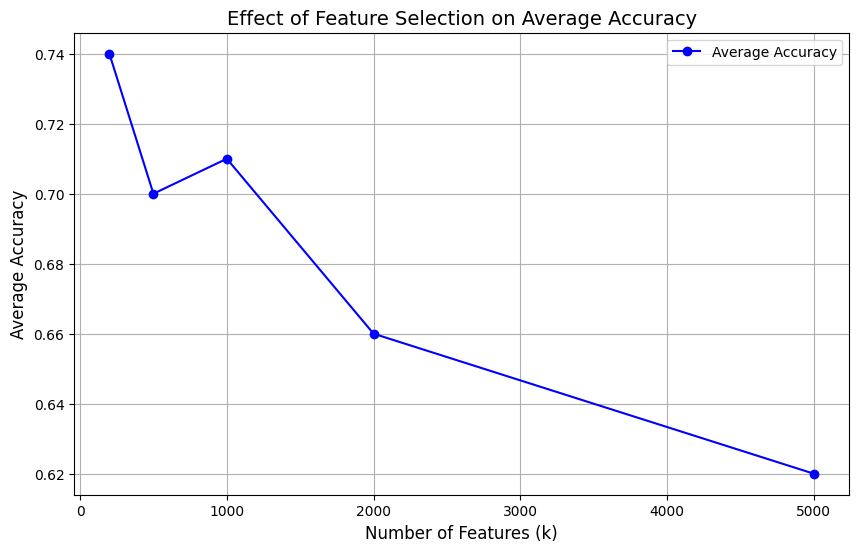

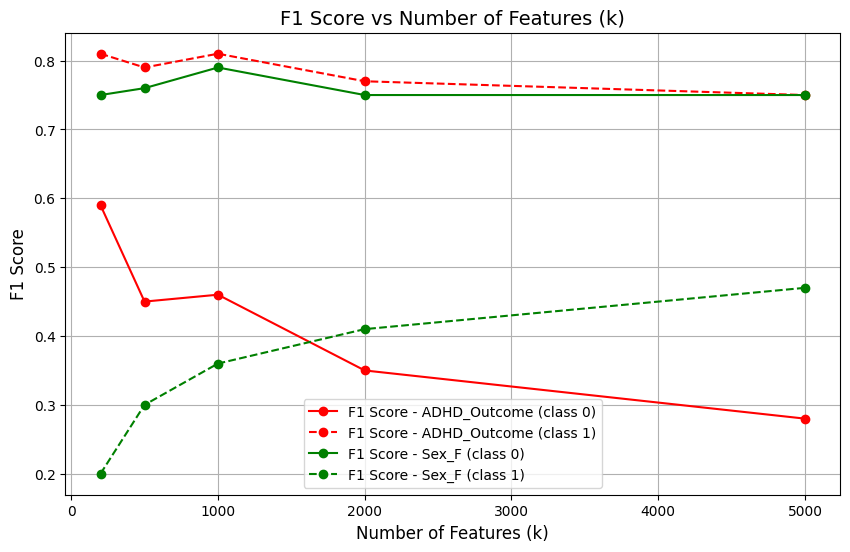

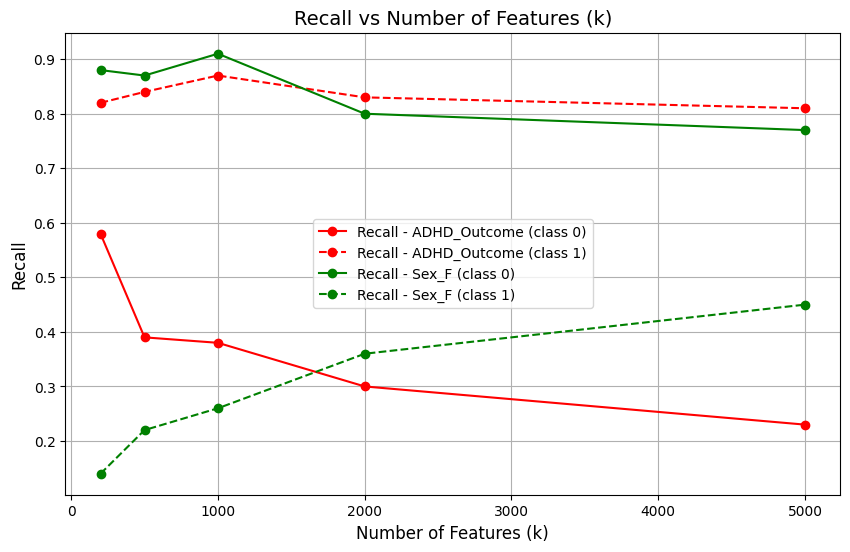

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Corrected data based on classification reports
k_values = [200, 500, 1000, 2000, 5000]

# F1 Scores and Recall for ADHD_Outcome and Sex_F
f1_scores_adhd = [0.59, 0.45, 0.46, 0.35, 0.28]  # F1 scores for ADHD_Outcome (class 0)
f1_scores_adhd_1 = [0.81, 0.79, 0.81, 0.77, 0.75]  # F1 scores for ADHD_Outcome (class 1)

f1_scores_sex = [0.75, 0.76, 0.79, 0.75, 0.75]  # F1 scores for Sex_F (class 0)
f1_scores_sex_1 = [0.20, 0.30, 0.36, 0.41, 0.47]  # F1 scores for Sex_F (class 1)

recall_adhd = [0.58, 0.39, 0.38, 0.30, 0.23]       # Recall for ADHD_Outcome (class 0)
recall_adhd_1 = [0.82, 0.84, 0.87, 0.83, 0.81]     # Recall for ADHD_Outcome (class 1)

recall_sex = [0.88, 0.87, 0.91, 0.80, 0.77]        # Recall for Sex_F (class 0)
recall_sex_1 = [0.14, 0.22, 0.26, 0.36, 0.45]      # Recall for Sex_F (class 1)

accuracy = [0.74, 0.70, 0.71, 0.66, 0.62]  # Accuracy for each k

# Plotting Average Accuracy vs k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy, marker='o', linestyle='-', color='b', label='Average Accuracy')
plt.xlabel('Number of Features (k)', fontsize=12)
plt.ylabel('Average Accuracy', fontsize=12)
plt.title('Effect of Feature Selection on Average Accuracy', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

# Plotting F1 Scores for each class (ADHD_Outcome and Sex_F)
plt.figure(figsize=(10, 6))
plt.plot(k_values, f1_scores_adhd, marker='o', linestyle='-', color='r', label='F1 Score - ADHD_Outcome (class 0)')
plt.plot(k_values, f1_scores_adhd_1, marker='o', linestyle='--', color='r', label='F1 Score - ADHD_Outcome (class 1)')
plt.plot(k_values, f1_scores_sex, marker='o', linestyle='-', color='g', label='F1 Score - Sex_F (class 0)')
plt.plot(k_values, f1_scores_sex_1, marker='o', linestyle='--', color='g', label='F1 Score - Sex_F (class 1)')
plt.xlabel('Number of Features (k)', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.title('F1 Score vs Number of Features (k)', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

# Plotting Recall for each class (ADHD_Outcome and Sex_F)
plt.figure(figsize=(10, 6))
plt.plot(k_values, recall_adhd, marker='o', linestyle='-', color='r', label='Recall - ADHD_Outcome (class 0)')
plt.plot(k_values, recall_adhd_1, marker='o', linestyle='--', color='r', label='Recall - ADHD_Outcome (class 1)')
plt.plot(k_values, recall_sex, marker='o', linestyle='-', color='g', label='Recall - Sex_F (class 0)')
plt.plot(k_values, recall_sex_1, marker='o', linestyle='--', color='g', label='Recall - Sex_F (class 1)')
plt.xlabel('Number of Features (k)', fontsize=12)
plt.ylabel('Recall', fontsize=12)
plt.title('Recall vs Number of Features (k)', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()


## Trials with Logistic Regression

In [ ]:
#Firrst we will perform logistic regression with a simple train-test split and apply gridsearch to find the best regularization criterion

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

# 1. Train-test split (no stratification, no oversampling)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# 2. Initialize logistic regression and wrap in MultiOutputClassifier
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
multi_log_reg = MultiOutputClassifier(log_reg)

# 3. Define hyperparameter grid for logistic regression
param_grid = {
    'estimator__C': [0.01, 0.1, 1, 10],  # Regularization strength
    'estimator__penalty': ['l1', 'l2'],  # Regularization type
}

# 4. Grid search with cross-validation
grid_search = GridSearchCV(
    multi_log_reg,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# 5. Fit the model
grid_search.fit(x_train, y_train)

# 6. Predict on the test set
y_pred = grid_search.best_estimator_.predict(x_test)

# 7. Print best hyperparameters
print("Best hyperparameters found: ", grid_search.best_params_)

# 8. Evaluation for each target
for i, column in enumerate(y.columns):
    print(f"\nClassification report for {column}:\n")
    print(classification_report(y_test.iloc[:, i], y_pred[:, i]))


Best hyperparameters found:  {'estimator__C': 0.1, 'estimator__penalty': 'l1'}

Classification report for ADHD_Outcome:

              precision    recall  f1-score   support

           0       0.68      0.60      0.64        84
           1       0.80      0.86      0.83       159

    accuracy                           0.77       243
   macro avg       0.74      0.73      0.73       243
weighted avg       0.76      0.77      0.76       243


Classification report for Sex_F:

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       165
           1       0.57      0.51      0.54        78

    accuracy                           0.72       243
   macro avg       0.68      0.67      0.67       243
weighted avg       0.71      0.72      0.72       243



In [ ]:
#After trying logistic regression without any advanced tuning or balancing tricks, the model already gives decent performance.
#For the ADHD_Outcome target, it seems to handle the class imbalance relatively well, getting a good recall for class 1 (0.86),
#which might be the more important class depending on the problem. For the Sex_F target, performance is a bit lower, especially in terms of precision and recall
#for class 1, meaning it struggles a bit more with predicting females. But overall, accuracy scores of 77% and 72% show that logistic regression is a
#good starting point before applying techniques like class balancing, regularization tuning, or feature engineering.

In [ ]:
#Now we will redo the previous cell but with a stratified label train-test split
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

# Create stratification labels combining both target variables
stratify_labels = y['ADHD_Outcome'].astype(str) + "_" + y['Sex_F'].astype(str)

# Split the data using stratified labels
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, stratify=stratify_labels, random_state=42
)

# Define the logistic regression model
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')  # 'liblinear' supports l1 and l2

# Wrap with MultiOutputClassifier
multi_log_reg = MultiOutputClassifier(log_reg)

# Define the hyperparameter grid
param_grid = {
    'estimator__penalty': ['l1', 'l2'],
    'estimator__C': [0.01, 0.1, 1, 10]
}

# Perform grid search with 5-fold CV
grid_search = GridSearchCV(estimator=multi_log_reg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Best model and parameters
best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Predict on test set
y_pred = best_model.predict(x_test)

# Evaluate each target
for i, column in enumerate(y.columns):
    print(f"\nClassification report for {column}:\n")
    print(classification_report(y_test.iloc[:, i], y_pred[:, i]))


Best parameters: {'estimator__C': 0.1, 'estimator__penalty': 'l1'}

Classification report for ADHD_Outcome:

              precision    recall  f1-score   support

           0       0.58      0.59      0.59        76
           1       0.81      0.81      0.81       167

    accuracy                           0.74       243
   macro avg       0.70      0.70      0.70       243
weighted avg       0.74      0.74      0.74       243


Classification report for Sex_F:

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       160
           1       0.64      0.51      0.56        83

    accuracy                           0.73       243
   macro avg       0.70      0.68      0.69       243
weighted avg       0.72      0.73      0.72       243



In [ ]:
#After applying logistic regression using a MultiOutputClassifier with a stratified train-test split based on combined target labels,
#we performed grid search to find the best regularization setup. The model performed well, especially on the ADHD_Outcome label,
#achieving strong precision and recall for both classes (macro F1 ~0.70). The Sex_F prediction was also decent,
#although recall for class 1 (females) was a bit lower, which could hint at class imbalance.
#The best parameters selected by the grid search were C=0.1 with L1 regularization, which suggests a sparse model worked better here.

In [ ]:
#We will now try to use class weighting via class_weight='balanced' in logistic regression, which compensates for class imbalances by
#adjusting the penalty inversely proportional to class frequency. Also, we will try different solvers and use the stratified split.

from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

# Stratified labels for consistent splitting
stratify_labels = y['ADHD_Outcome'].astype(str) + "_" + y['Sex_F'].astype(str)

# Train-test split (30% test size)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, stratify=stratify_labels, random_state=42
)

# Base logistic regression model
log_reg = LogisticRegression(class_weight='balanced', max_iter=500)

# MultiOutput wrapper
multi_log = MultiOutputClassifier(log_reg)

# Define a simpler param grid for optimization
param_grid = {
    'estimator__penalty': ['l2'],  # Only using l2 for simplicity
    'estimator__C': [0.01, 0.1],  # Fewer values for C
    'estimator__solver': ['liblinear', 'lbfgs'],  # Reduced solvers
    'estimator__max_iter': [100, 200],  # Fewer iterations
}

# Grid search with 3-fold cross-validation for optimization
grid = GridSearchCV(multi_log, param_grid, cv=3, n_jobs=-1, scoring='accuracy', verbose=1)
grid.fit(x_train, y_train)

# Best parameters
print("Best parameters:", grid.best_params_)

# Prediction
y_pred = grid.best_estimator_.predict(x_test)

# Classification reports for each output variable
for i, column in enumerate(y.columns):
    print(f"\nClassification report for {column}:\n")
    print(classification_report(y_test.iloc[:, i], y_pred[:, i]))


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters: {'estimator__C': 0.01, 'estimator__max_iter': 100, 'estimator__penalty': 'l2', 'estimator__solver': 'lbfgs'}

Classification report for ADHD_Outcome:

              precision    recall  f1-score   support

           0       0.42      0.37      0.39       115
           1       0.72      0.76      0.74       249

    accuracy                           0.64       364
   macro avg       0.57      0.57      0.57       364
weighted avg       0.63      0.64      0.63       364


Classification report for Sex_F:

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       239
           1       0.69      0.65      0.67       125

    accuracy                           0.78       364
   macro avg       0.75      0.75      0.75       364
weighted avg       0.77      0.78      0.78       364



In [ ]:
#New hyperparameter tuning verified that the first case was better (L1 with liblinear solver). So now we will try it
#again with the balanced class weights.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

# Stratified labels for consistent splitting
stratify_labels = y['ADHD_Outcome'].astype(str) + "_" + y['Sex_F'].astype(str)

# Train-test split (30% test size is reasonable, no change here)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, stratify=stratify_labels, random_state=42
)

# Base logistic regression model with class weighting and simpler regularization
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')

# MultiOutput wrapper
multi_log = MultiOutputClassifier(log_reg)

# Simplified param grid
param_grid = {
    'estimator__penalty': ['l1'],
    'estimator__C': [0.1, 1],
}

# Grid search with 3-fold cross-validation for optimization
grid = GridSearchCV(multi_log, param_grid, cv=3, n_jobs=-1, scoring='accuracy', verbose=1)  # Add verbose to track progress
grid.fit(x_train, y_train)

# Best parameters
print("Best parameters:", grid.best_params_)

# Prediction
y_pred = grid.best_estimator_.predict(x_test)

# Classification reports
for i, column in enumerate(y.columns):
    print(f"\nClassification report for {column}:\n")
    print(classification_report(y_test.iloc[:, i], y_pred[:, i]))


Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best parameters: {'estimator__C': 1, 'estimator__penalty': 'l1'}

Classification report for ADHD_Outcome:

              precision    recall  f1-score   support

           0       0.56      0.61      0.58       115
           1       0.81      0.78      0.79       249

    accuracy                           0.72       364
   macro avg       0.68      0.69      0.69       364
weighted avg       0.73      0.72      0.73       364


Classification report for Sex_F:

              precision    recall  f1-score   support

           0       0.77      0.74      0.76       239
           1       0.54      0.58      0.56       125

    accuracy                           0.69       364
   macro avg       0.66      0.66      0.66       364
weighted avg       0.69      0.69      0.69       364



In [ ]:
#Accuracy took a bit of hit (compared to L1 + liblinear without balancing class weights). Also, f1 score and recall for majority
#classes decreased a bit. However, recall and f1 score for the minority class improved a bit.

In [ ]:
#Testing the L1 + liblinear solver even more

from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

# Stratified labels for consistent splitting
stratify_labels = y['ADHD_Outcome'].astype(str) + "_" + y['Sex_F'].astype(str)

# Train-test split (30% test size is reasonable, no change here)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, stratify=stratify_labels, random_state=42
)

# Base logistic regression model (L1 regularization, no class weighting)
log_reg = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)

# MultiOutput wrapper
multi_log = MultiOutputClassifier(log_reg)

# Define param grid for optimization (without class weight balancing)
param_grid = {
    'estimator__C': [0.01, 0.05, 0.1],
    'estimator__max_iter': [100, 200, 500],
    'estimator__tol': [1e-4, 1e-3, 1e-2]
}

# Grid search with 3-fold cross-validation for optimization
grid = GridSearchCV(multi_log, param_grid, cv=3, n_jobs=-1, scoring='accuracy', verbose=1)
grid.fit(x_train, y_train)

# Best parameters
print("Best parameters:", grid.best_params_)

# Prediction
y_pred = grid.best_estimator_.predict(x_test)

# Classification reports
for i, column in enumerate(y.columns):
    print(f"\nClassification report for {column}:\n")
    print(classification_report(y_test.iloc[:, i], y_pred[:, i]))


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters: {'estimator__C': 0.05, 'estimator__max_iter': 100, 'estimator__tol': 0.001}

Classification report for ADHD_Outcome:

              precision    recall  f1-score   support

           0       0.62      0.55      0.58       115
           1       0.80      0.85      0.82       249

    accuracy                           0.75       364
   macro avg       0.71      0.70      0.70       364
weighted avg       0.75      0.75      0.75       364


Classification report for Sex_F:

              precision    recall  f1-score   support

           0       0.74      0.88      0.80       239
           1       0.64      0.40      0.49       125

    accuracy                           0.72       364
   macro avg       0.69      0.64      0.65       364
weighted avg       0.70      0.72      0.70       364



In [ ]:
#Redo previous cell with class balancing

from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

# Stratified labels for consistent splitting
stratify_labels = y['ADHD_Outcome'].astype(str) + "_" + y['Sex_F'].astype(str)

# Train-test split (30% test size is reasonable, no change here)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, stratify=stratify_labels, random_state=42
)

# Base logistic regression model (L1 regularization, with class weighting)
log_reg = LogisticRegression(penalty='l1', solver='liblinear', class_weight='balanced', max_iter=1000)

# MultiOutput wrapper
multi_log = MultiOutputClassifier(log_reg)

# Define param grid for optimization (with class weight balancing)
param_grid = {
    'estimator__C': [0.01, 0.05, 0.1],
    'estimator__max_iter': [100, 200, 500],
    'estimator__tol': [1e-4, 1e-3, 1e-2]
}

# Grid search with 3-fold cross-validation for optimization
grid = GridSearchCV(multi_log, param_grid, cv=3, n_jobs=-1, scoring='accuracy', verbose=1)
grid.fit(x_train, y_train)

# Best parameters
print("Best parameters:", grid.best_params_)

# Prediction
y_pred = grid.best_estimator_.predict(x_test)

# Classification reports
for i, column in enumerate(y.columns):
    print(f"\nClassification report for {column}:\n")
    print(classification_report(y_test.iloc[:, i], y_pred[:, i]))


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters: {'estimator__C': 0.1, 'estimator__max_iter': 500, 'estimator__tol': 0.01}

Classification report for ADHD_Outcome:

              precision    recall  f1-score   support

           0       0.56      0.70      0.62       115
           1       0.84      0.74      0.79       249

    accuracy                           0.73       364
   macro avg       0.70      0.72      0.71       364
weighted avg       0.75      0.73      0.74       364


Classification report for Sex_F:

              precision    recall  f1-score   support

           0       0.79      0.72      0.76       239
           1       0.54      0.63      0.59       125

    accuracy                           0.69       364
   macro avg       0.67      0.68      0.67       364
weighted avg       0.71      0.69      0.70       364



In [ ]:
#Again when changing from unbalanced to balanced the accuracy takes a bit of hit but the scores start being close.
#Overall, it seems better to have L1 + liblinear + balanced class weights. This is because the minority classes start
#to get some meaninful representation in the model.

In [ ]:
# Now we will perform feature selection and classification on a multi-label problem
# where the targets are 'ADHD_Outcome' and 'Sex_F'. We want to reduce input
# dimensionality using model-based feature selection informed by both targets,
# then train and evaluate a classifier using only the selected features.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
import numpy as np

# Stratified split on both targets
stratify_labels = y['ADHD_Outcome'].astype(str) + "_" + y['Sex_F'].astype(str)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, stratify=stratify_labels, random_state=42
)

# Base estimator for feature selection (with L1 penalty)
base_selector_model = LogisticRegression(penalty='l1', solver='liblinear', C=0.1, max_iter=1000)
multi_selector = MultiOutputClassifier(base_selector_model)
multi_selector.fit(x_train, y_train)

# Combine absolute coefficients across both outputs
coefs = np.abs(np.vstack([est.coef_ for est in multi_selector.estimators_]))
mean_coef = np.mean(coefs, axis=0)

# Select features where mean absolute coefficient is > 0
selected_features = mean_coef > 0
x_train_sel = x_train.loc[:, selected_features]
x_test_sel = x_test.loc[:, selected_features]

print(f"Selected {x_train_sel.shape[1]} features out of {x.shape[1]}")

# Train MultiOutputClassifier on selected features with class balancing
final_model = LogisticRegression(penalty='l1', solver='liblinear', class_weight='balanced', max_iter=1000)
multi_clf = MultiOutputClassifier(final_model)

# GridSearchCV
param_grid = {
    'estimator__C': [0.01, 0.05, 0.1],
    'estimator__max_iter': [100, 200, 500],
    'estimator__tol': [1e-4, 1e-3, 1e-2]
}
grid = GridSearchCV(multi_clf, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid.fit(x_train_sel, y_train)

# Predict and report
y_pred = grid.best_estimator_.predict(x_test_sel)
print("Best parameters:", grid.best_params_)
for i, column in enumerate(y.columns):
    print(f"\nClassification report for {column}:\n")
    print(classification_report(y_test.iloc[:, i], y_pred[:, i]))


Selected 633 features out of 19971
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters: {'estimator__C': 0.1, 'estimator__max_iter': 200, 'estimator__tol': 0.01}

Classification report for ADHD_Outcome:

              precision    recall  f1-score   support

           0       0.55      0.67      0.61       115
           1       0.83      0.75      0.79       249

    accuracy                           0.73       364
   macro avg       0.69      0.71      0.70       364
weighted avg       0.74      0.73      0.73       364


Classification report for Sex_F:

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       239
           1       0.59      0.66      0.62       125

    accuracy                           0.72       364
   macro avg       0.70      0.71      0.70       364
weighted avg       0.73      0.72      0.73       364



In [ ]:
#Feature selection definitely improved performance a bit. Accuracy stayed as high as the first run in this section while the f1
#score and recall remained balanced between the minority and majority classes.

In [ ]:
#Now we will try a different method of feature selection, namely SelectKBest. This allows univariate feature selection.
#Also we will try different values of k to see which one performs best for the dataset.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import pandas as pd

# ----- Split your dataset (x = features, y = targets) -----
stratify_labels = y['ADHD_Outcome'].astype(str) + "_" + y['Sex_F'].astype(str)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, stratify=stratify_labels, random_state=42
)

# ----- Define values of k to try -----
k_values = [10, 25, 50, 100, 200, 500, 1000, 2000, 5000]
results = {}

# ----- Loop through each k value -----
for k in k_values:
    print(f"\n===== Trying k = {k} =====")

    # Feature selection per target
    selector_adhd = SelectKBest(score_func=f_classif, k=k).fit(x_train, y_train['ADHD_Outcome'])
    selector_sex = SelectKBest(score_func=f_classif, k=k).fit(x_train, y_train['Sex_F'])

    # Combine feature masks: intersection
    combined_mask = selector_adhd.get_support() & selector_sex.get_support()

    # Ensure at least one feature is selected
    if not combined_mask.any():
        print("No common features selected for k =", k)
        continue

    # Reduce datasets
    x_train_sel = x_train.loc[:, combined_mask]
    x_test_sel = x_test.loc[:, combined_mask]

    # Define logistic regression with class balancing
    log_reg = LogisticRegression(
        penalty='l1', solver='liblinear', class_weight='balanced', max_iter=1000
    )
    multi_log = MultiOutputClassifier(log_reg)

    # Hyperparameter grid
    param_grid = {
        'estimator__C': [0.01, 0.1, 1],
        'estimator__tol': [1e-4, 1e-3]
    }

    # Grid search
    grid = GridSearchCV(
        multi_log, param_grid, cv=3, scoring='accuracy', verbose=0, n_jobs=-1
    )
    grid.fit(x_train_sel, y_train)

    # Predict
    y_pred = grid.best_estimator_.predict(x_test_sel)

    # Accuracy scores for each target
    acc_scores = []
    for i, column in enumerate(y.columns):
        acc = accuracy_score(y_test.iloc[:, i], y_pred[:, i])
        acc_scores.append(acc)
        print(f"\nClassification report for {column} (k={k}):")
        print(classification_report(y_test.iloc[:, i], y_pred[:, i]))

    # Average accuracy across both targets
    avg_acc = np.mean(acc_scores)
    results[k] = avg_acc
    print(f" Average accuracy for k={k}: {avg_acc:.4f}")

# ----- Show best k -----
best_k = max(results, key=results.get)
print(f"\n Best k: {best_k} with average accuracy: {results[best_k]:.4f}")



===== Trying k = 10 =====
No common features selected for k = 10

===== Trying k = 25 =====
No common features selected for k = 25

===== Trying k = 50 =====
No common features selected for k = 50

===== Trying k = 100 =====
No common features selected for k = 100

===== Trying k = 200 =====

Classification report for ADHD_Outcome (k=200):
              precision    recall  f1-score   support

           0       0.49      0.82      0.61       115
           1       0.88      0.61      0.72       249

    accuracy                           0.67       364
   macro avg       0.68      0.71      0.66       364
weighted avg       0.76      0.67      0.68       364


Classification report for Sex_F (k=200):
              precision    recall  f1-score   support

           0       0.66      1.00      0.79       239
           1       0.00      0.00      0.00       125

    accuracy                           0.66       364
   macro avg       0.33      0.50      0.40       364
weighted avg    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification report for ADHD_Outcome (k=500):
              precision    recall  f1-score   support

           0       0.51      0.70      0.59       115
           1       0.83      0.69      0.76       249

    accuracy                           0.70       364
   macro avg       0.67      0.70      0.67       364
weighted avg       0.73      0.70      0.70       364


Classification report for Sex_F (k=500):
              precision    recall  f1-score   support

           0       0.76      0.67      0.72       239
           1       0.49      0.60      0.54       125

    accuracy                           0.65       364
   macro avg       0.63      0.64      0.63       364
weighted avg       0.67      0.65      0.66       364

 Average accuracy for k=500: 0.6717

===== Trying k = 1000 =====

Classification report for ADHD_Outcome (k=1000):
              precision    recall  f1-score   support

           0       0.49      0.64      0.56       115
           1       0.81      0.

In [ ]:
#In the next code cell, some graphs are provided to showcase the results of the previous cell better.

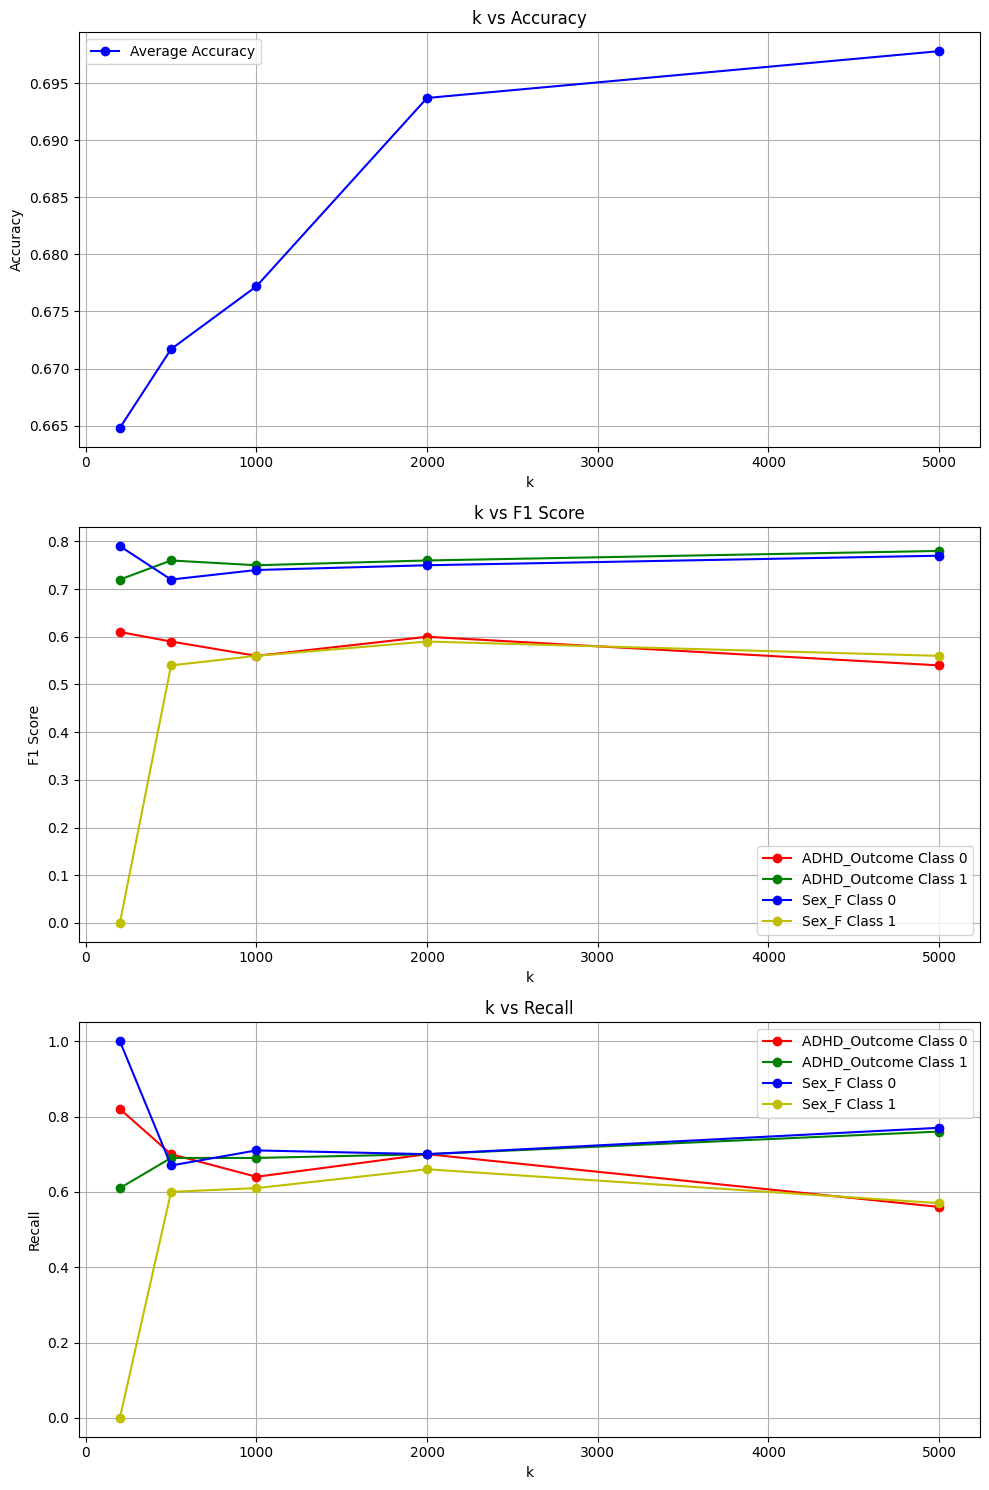

In [ ]:
import matplotlib.pyplot as plt

# k values
k_values = [200, 500, 1000, 2000, 5000]

# Accuracy values (average across both targets)
accuracy = [0.6648, 0.6717, 0.6772, 0.6937, 0.6978]

# F1-scores per class per target
# ADHD_Outcome: [class 0, class 1]
adhd_f1 = {
    0: [0.61, 0.59, 0.56, 0.60, 0.54],
    1: [0.72, 0.76, 0.75, 0.76, 0.78]
}

# Sex_F: [class 0, class 1]
sex_f1 = {
    0: [0.79, 0.72, 0.74, 0.75, 0.77],
    1: [0.00, 0.54, 0.56, 0.59, 0.56]
}

# Recall per class per target
# ADHD_Outcome: [class 0, class 1]
adhd_recall = {
    0: [0.82, 0.70, 0.64, 0.70, 0.56],
    1: [0.61, 0.69, 0.69, 0.70, 0.76]
}

# Sex_F: [class 0, class 1]
sex_recall = {
    0: [1.00, 0.67, 0.71, 0.70, 0.77],
    1: [0.00, 0.60, 0.61, 0.66, 0.57]
}

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Accuracy plot
axs[0].plot(k_values, accuracy, marker='o', label='Average Accuracy', color='b')
axs[0].set_title('k vs Accuracy')
axs[0].set_xlabel('k')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].grid(True)

# F1-score plot
axs[1].plot(k_values, adhd_f1[0], marker='o', label='ADHD_Outcome Class 0', color='r')
axs[1].plot(k_values, adhd_f1[1], marker='o', label='ADHD_Outcome Class 1', color='g')
axs[1].plot(k_values, sex_f1[0], marker='o', label='Sex_F Class 0', color='b')
axs[1].plot(k_values, sex_f1[1], marker='o', label='Sex_F Class 1', color='y')
axs[1].set_title('k vs F1 Score')
axs[1].set_xlabel('k')
axs[1].set_ylabel('F1 Score')
axs[1].legend()
axs[1].grid(True)

# Recall plot
axs[2].plot(k_values, adhd_recall[0], marker='o', label='ADHD_Outcome Class 0', color='r')
axs[2].plot(k_values, adhd_recall[1], marker='o', label='ADHD_Outcome Class 1', color='g')
axs[2].plot(k_values, sex_recall[0], marker='o', label='Sex_F Class 0', color='b')
axs[2].plot(k_values, sex_recall[1], marker='o', label='Sex_F Class 1', color='y')
axs[2].set_title('k vs Recall')
axs[2].set_xlabel('k')
axs[2].set_ylabel('Recall')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()


In [ ]:
#The below code cell tries out PCA in this way:
#PCA Integration: It applies PCA (using different numbers of components) before fitting the logistic regression model in a pipeline.

#Evaluation: For each value of n_components, it evaluates accuracy, F1-score, and recall for both target variables (ADHD_Outcome and Sex_F).

#Plots: It then plots k (the number of components) against accuracy, F1-score, and recall to help you visually analyze the effect of PCA.


Classification report for ADHD_Outcome:

              precision    recall  f1-score   support

           0       0.38      0.31      0.34       115
           1       0.71      0.76      0.73       249

    accuracy                           0.62       364
   macro avg       0.54      0.54      0.54       364
weighted avg       0.60      0.62      0.61       364


Classification report for Sex_F:

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       239
           1       0.62      0.56      0.59       125

    accuracy                           0.73       364
   macro avg       0.70      0.69      0.70       364
weighted avg       0.73      0.73      0.73       364



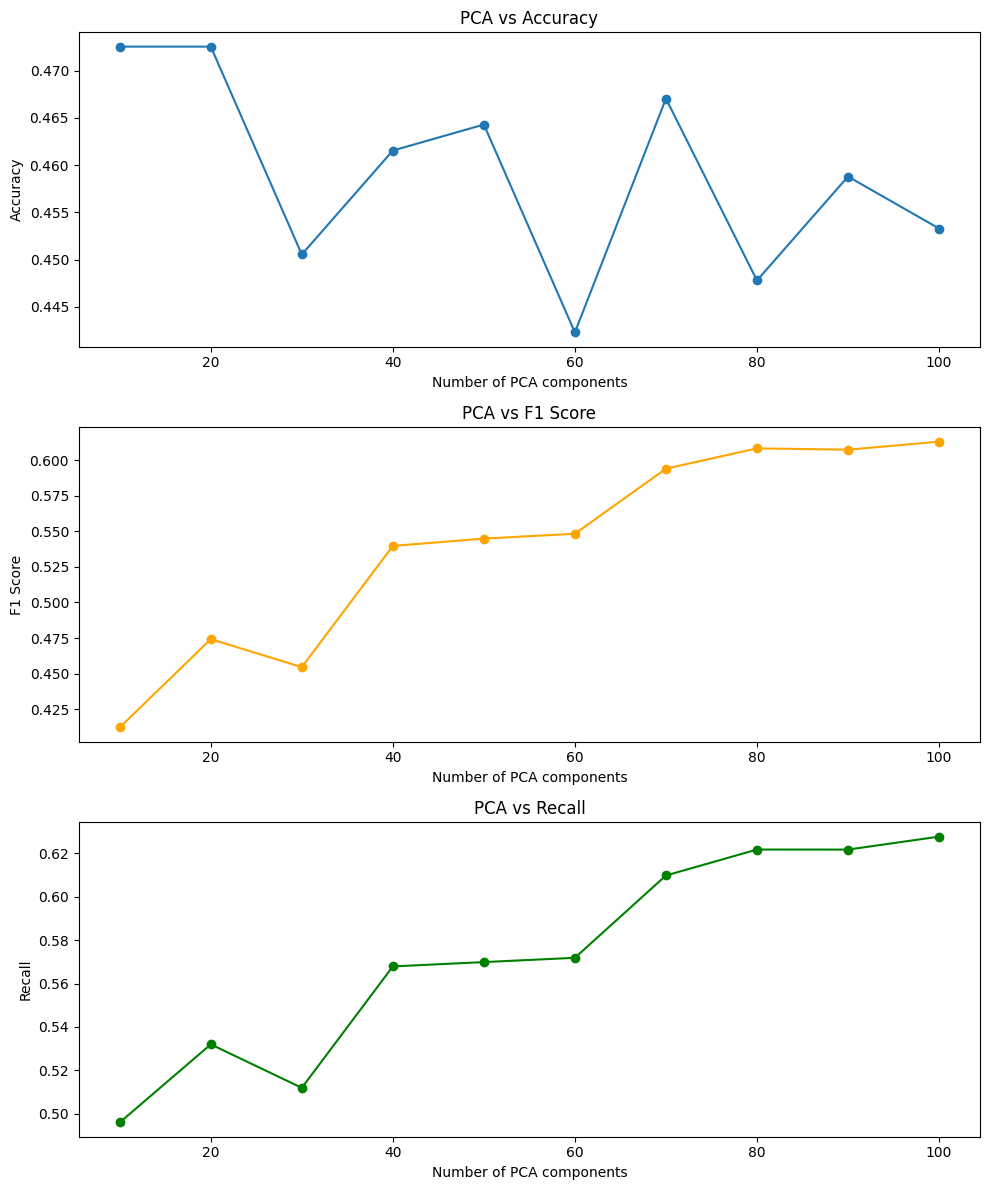

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Stratified labels for consistent splitting
stratify_labels = y['ADHD_Outcome'].astype(str) + "_" + y['Sex_F'].astype(str)

# Train-test split (30% test size)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, stratify=stratify_labels, random_state=42
)

# Define PCA and Logistic Regression pipeline
# StandardScaler is used for feature scaling before PCA
pca = PCA()
log_reg = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
multi_log = MultiOutputClassifier(make_pipeline(StandardScaler(), pca, log_reg))

# Fit the model
multi_log.fit(x_train, y_train)

# Predict on test data
y_pred = multi_log.predict(x_test)

# Classification reports for each target
for i, column in enumerate(y.columns):
    print(f"\nClassification report for {column}:\n")
    print(classification_report(y_test.iloc[:, i], y_pred[:, i]))

# If you want to plot the effect of PCA on performance, you can apply PCA with different numbers of components.
# Let's vary the number of components from 10 to 100 in steps of 10
pca_accuracies = []
pca_f1_scores = []
pca_recalls = []

# Try PCA with different values of n_components
for n_components in range(10, 101, 10):
    pca = PCA(n_components=n_components)
    multi_log = MultiOutputClassifier(make_pipeline(StandardScaler(), pca, log_reg))
    multi_log.fit(x_train, y_train)
    y_pred = multi_log.predict(x_test)

    # Evaluate performance
    accuracy = multi_log.score(x_test, y_test)
    f1 = [classification_report(y_test.iloc[:, i], y_pred[:, i], output_dict=True)['1']['f1-score'] for i in range(y.shape[1])]
    recall = [classification_report(y_test.iloc[:, i], y_pred[:, i], output_dict=True)['1']['recall'] for i in range(y.shape[1])]

    pca_accuracies.append(accuracy)
    pca_f1_scores.append(sum(f1) / len(f1))  # Average F1-score across all targets
    pca_recalls.append(sum(recall) / len(recall))  # Average recall across all targets

# Plot k vs accuracy, F1-score, and recall for each target
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Accuracy plot
axs[0].plot(range(10, 101, 10), pca_accuracies, marker='o')
axs[0].set_title('PCA vs Accuracy')
axs[0].set_xlabel('Number of PCA components')
axs[0].set_ylabel('Accuracy')

# F1-score plot
axs[1].plot(range(10, 101, 10), pca_f1_scores, marker='o', color='orange')
axs[1].set_title('PCA vs F1 Score')
axs[1].set_xlabel('Number of PCA components')
axs[1].set_ylabel('F1 Score')

# Recall plot
axs[2].plot(range(10, 101, 10), pca_recalls, marker='o', color='green')
axs[2].set_title('PCA vs Recall')
axs[2].set_xlabel('Number of PCA components')
axs[2].set_ylabel('Recall')

plt.tight_layout()
plt.show()


In [ ]:
#PCA didnt help, actually it made the average scores of f1, recall, and accuracy worse. This follows the trend we saw with PCA in KNN.

## Trials with Decision Trees

In [ ]:
#For decision trees we will attempt the following things to make the model perform well:
#Feature selection, balancing class weights, hyperparameter tuning, and stratified splitting.
#However, we will not use PCA here as PCA creates linear combinations of features,
#which destroys feature interpretability, and decision trees work best with original features.

In [ ]:
#Here we will tune hyperparameters of the decision trees. We won't apply class balancing just yet and stratified splitting is used.

from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import numpy as np

# Combine targets for stratification
stratify_labels = y['ADHD_Outcome'].astype(str) + "_" + y['Sex_F'].astype(str)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    stratify=stratify_labels,
    random_state=42
)

# Cross-validation stratification
cv_stratify = y_train['ADHD_Outcome'].astype(str) + "_" + y_train['Sex_F'].astype(str)

# Base classifier
base_dt = DecisionTreeClassifier(random_state=42)
multi_target_dt = MultiOutputClassifier(base_dt)

# Smaller parameter grid
param_dist = {
    'estimator__max_depth': [5, 10, None],
    'estimator__min_samples_split': [2, 5],
    'estimator__min_samples_leaf': [1, 2],
    'estimator__max_features': [None, 'sqrt']
}

# Stratified K-Fold (3 splits for speed)
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Randomized search
random_search = RandomizedSearchCV(
    estimator=multi_target_dt,
    param_distributions=param_dist,
    n_iter=10,                  # Try only 10 random combinations
    scoring='accuracy',
    cv=cv.split(X_train, cv_stratify),
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Best model
best_model = random_search.best_estimator_

# Predict
y_pred = best_model.predict(X_test)

# Evaluate
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))

print("\nADHD Classification Report:")
print(classification_report(y_test['ADHD_Outcome'], y_pred[:, 0]))

print("\nSex_F Classification Report:")
print(classification_report(y_test['Sex_F'], y_pred[:, 1]))

print("\nConfusion Matrix for ADHD:")
print(confusion_matrix(y_test['ADHD_Outcome'], y_pred[:, 0]))

print("\nConfusion Matrix for Sex_F:")
print(confusion_matrix(y_test['Sex_F'], y_pred[:, 1]))

print("\nBest Hyperparameters Found:")
print(random_search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Accuracy on Test Set: 0.39094650205761317

ADHD Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.42      0.48        76
           1       0.76      0.84      0.80       167

    accuracy                           0.71       243
   macro avg       0.66      0.63      0.64       243
weighted avg       0.70      0.71      0.70       243


Sex_F Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.73      0.69       160
           1       0.34      0.27      0.30        83

    accuracy                           0.57       243
   macro avg       0.50      0.50      0.49       243
weighted avg       0.55      0.57      0.56       243


Confusion Matrix for ADHD:
[[ 32  44]
 [ 26 141]]

Confusion Matrix for Sex_F:
[[117  43]
 [ 61  22]]

Best Hyperparameters Found:
{'estimator__min_samples_split': 2, 'estimator__min_

In [ ]:
#Note that the accuracy printed in the first line of the previous code cell's output is the combined accuracy
#of both targets together i.e. if thee prediction was correct for BOTH targets.Moreover, the accuracy is okay
#but there is a bit of imbalance in recall and f1 score reflecting the imbalance in the class representation.
#In the next cell we will try making the class weights balanced in an attempt to improve the performance of the model.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Stratify using both target columns
stratify_labels = y['ADHD_Outcome'].astype(str) + "_" + y['Sex_F'].astype(str)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    stratify=stratify_labels,
    random_state=42
)

# Base decision tree classifier with balanced class weights
base_dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Wrap with MultiOutputClassifier
multi_target_dt = MultiOutputClassifier(base_dt)

# Smaller tuning grid for faster execution
param_dist = {
    'estimator__max_depth': [5, 10, 15,20,25,30],
    'estimator__min_samples_split': [2, 5,10],
    'estimator__min_samples_leaf': [1, 2,6],
    'estimator__max_features': [None, 'sqrt','log2']
}

# Randomized search with fewer iterations and folds
random_search = RandomizedSearchCV(
    estimator=multi_target_dt,
    param_distributions=param_dist,
    n_iter=10,  # smaller number of fits
    scoring='accuracy',
    cv=3,       # fewer CV folds
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the search
random_search.fit(X_train, y_train)

# Best model
best_model = random_search.best_estimator_

# Predict
y_pred = best_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy on Test Set:", accuracy)

# Classification reports
print("\nADHD Classification Report:")
print(classification_report(y_test['ADHD_Outcome'], y_pred[:, 0]))

print("\nGender Classification Report:")
print(classification_report(y_test['Sex_F'], y_pred[:, 1]))

# Confusion matrices
print("\nConfusion Matrix for ADHD Target:")
print(confusion_matrix(y_test['ADHD_Outcome'], y_pred[:, 0]))

print("\nConfusion Matrix for Gender Target:")
print(confusion_matrix(y_test['Sex_F'], y_pred[:, 1]))

# Best parameters found
print("\nBest Hyperparameters Found:", random_search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits

Accuracy on Test Set: 0.38271604938271603

ADHD Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.51      0.52        76
           1       0.78      0.80      0.79       167

    accuracy                           0.71       243
   macro avg       0.66      0.65      0.66       243
weighted avg       0.70      0.71      0.71       243


Gender Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.60      0.64       160
           1       0.38      0.48      0.43        83

    accuracy                           0.56       243
   macro avg       0.54      0.54      0.53       243
weighted avg       0.59      0.56      0.57       243


Confusion Matrix for ADHD Target:
[[ 39  37]
 [ 34 133]]

Confusion Matrix for Gender Target:
[[96 64]
 [43 40]]

Best Hyperparameters Found: {'estimator__min_samples_split': 5, 'es

In [ ]:
#For the cost of only slightly degraded accuracy, the recall and f1 scores improved a bit. Meaning the classes were more balancecd
#but the model porbably misclassified a little more of the majority at the expense of improving the representation of the minority class.

In [ ]:
#Now we will start trying to implement feature selection to enhance the performance.We will only use features that are relevant to both targets.

from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np
import pandas as pd

# ----- Split your dataset (x = features, y = targets) -----
stratify_labels = y['ADHD_Outcome'].astype(str) + "_" + y['Sex_F'].astype(str)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, stratify=stratify_labels, random_state=42
)

# ----- Define values of k to try -----
k_values = [10, 25, 50, 100, 200, 500, 1000, 2000, 5000]
results = {}

# ----- Loop through each k value -----
for k in k_values:
    print(f"\n===== Trying k = {k} =====")

    # Feature selection per target
    selector_adhd = SelectKBest(score_func=f_classif, k=k).fit(x_train, y_train['ADHD_Outcome'])
    selector_sex = SelectKBest(score_func=f_classif, k=k).fit(x_train, y_train['Sex_F'])

    # Combine feature masks: intersection
    combined_mask = selector_adhd.get_support() & selector_sex.get_support()

    # Ensure at least one feature is selected
    if not combined_mask.any():
        print("No common features selected for k =", k)
        continue

    # Reduce datasets
    x_train_sel = x_train.loc[:, combined_mask]
    x_test_sel = x_test.loc[:, combined_mask]

    # Define Decision Tree classifier with class balancing
    dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
    multi_dt = MultiOutputClassifier(dt)

    # Hyperparameter grid
    param_grid = {
        'estimator__max_depth': [5, 10, 20, None],
        'estimator__min_samples_split': [2, 5, 10],
        'estimator__min_samples_leaf': [1, 2, 5],
        'estimator__max_features': [None, 'sqrt', 'log2']
    }

    # Grid search
    grid = GridSearchCV(
        multi_dt, param_grid, cv=3, scoring='accuracy', verbose=0, n_jobs=-1
    )
    grid.fit(x_train_sel, y_train)

    # Predict
    y_pred = grid.best_estimator_.predict(x_test_sel)

    # Accuracy scores for each target
    acc_scores = []
    for i, column in enumerate(y.columns):
        acc = accuracy_score(y_test.iloc[:, i], y_pred[:, i])
        acc_scores.append(acc)
        print(f"\nClassification report for {column} (k={k}):")
        print(classification_report(y_test.iloc[:, i], y_pred[:, i]))

    # Average accuracy across both targets
    avg_acc = np.mean(acc_scores)
    results[k] = avg_acc
    print(f" Average accuracy for k={k}: {avg_acc:.4f}")

# ----- Show best k -----
best_k = max(results, key=results.get)
print(f"\n Best k: {best_k} with average accuracy: {results[best_k]:.4f}")




===== Trying k = 10 =====
No common features selected for k = 10

===== Trying k = 25 =====
No common features selected for k = 25

===== Trying k = 50 =====
No common features selected for k = 50

===== Trying k = 100 =====
No common features selected for k = 100

===== Trying k = 200 =====

Classification report for ADHD_Outcome (k=200):
              precision    recall  f1-score   support

           0       0.44      0.58      0.50       115
           1       0.77      0.65      0.71       249

    accuracy                           0.63       364
   macro avg       0.60      0.62      0.60       364
weighted avg       0.67      0.63      0.64       364


Classification report for Sex_F (k=200):
              precision    recall  f1-score   support

           0       0.65      0.58      0.61       239
           1       0.33      0.40      0.36       125

    accuracy                           0.52       364
   macro avg       0.49      0.49      0.49       364
weighted avg    

In [ ]:
#Note that here the accuracy is the average of the accuracy of each target alone. This is different than last time.
#The graphs to visualize the previous results are in the next code cell.

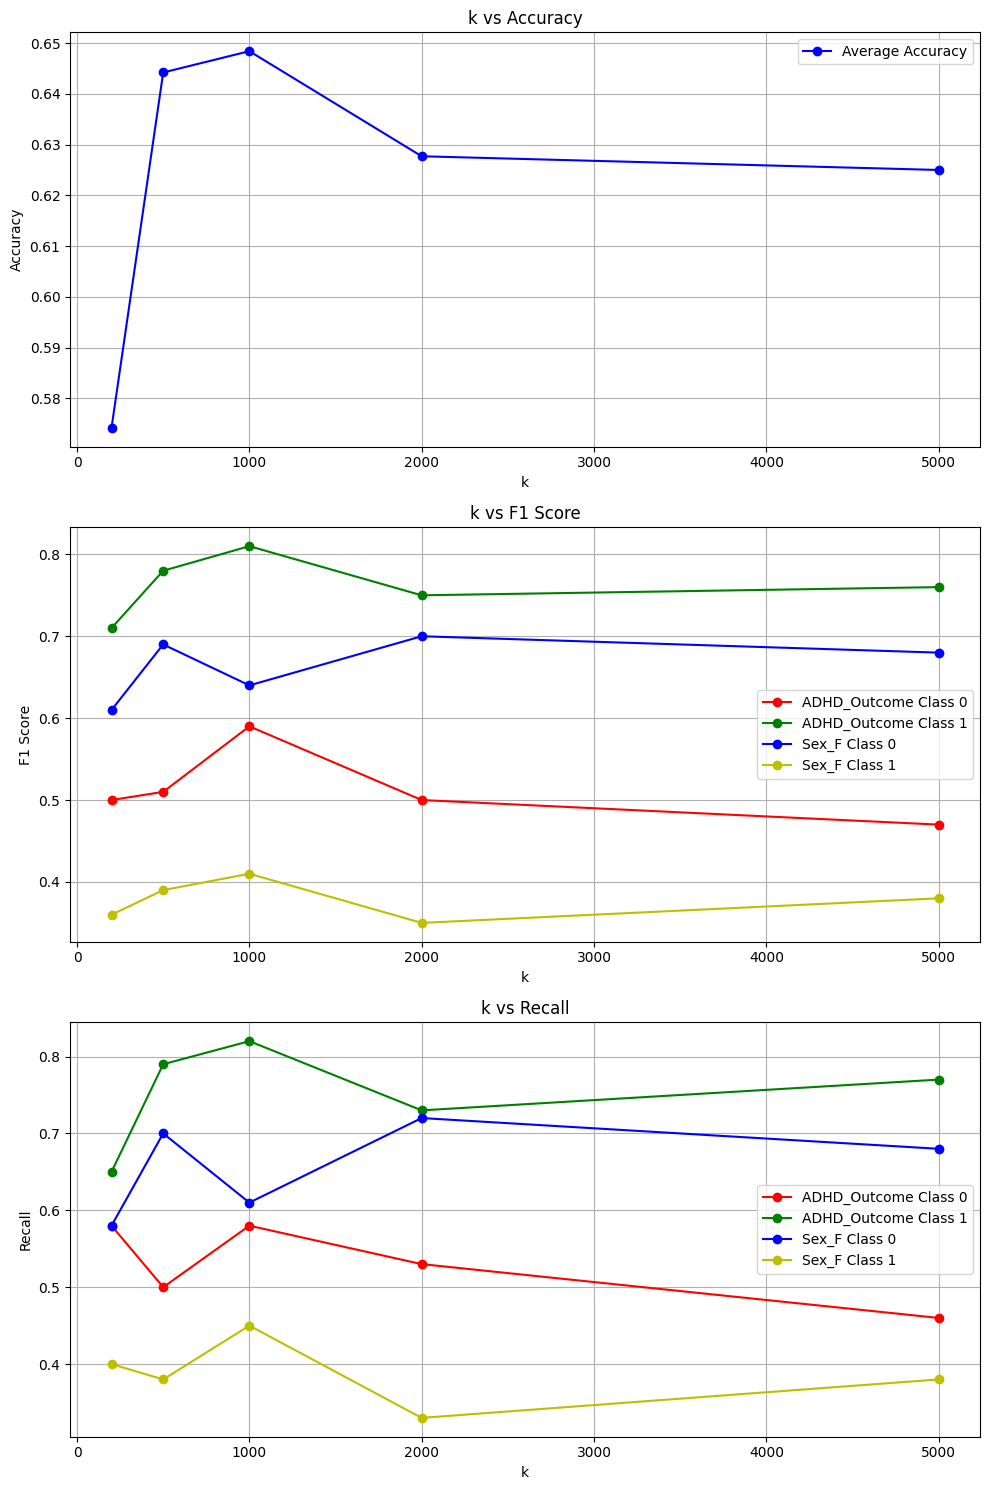

In [ ]:
import matplotlib.pyplot as plt

# k values
k_values = [200, 500, 1000, 2000, 5000]

# Accuracy values (average across both targets)
accuracy = [0.5742, 0.6442, 0.6484, 0.6277, 0.6250]

# F1-scores per class per target
# ADHD_Outcome: [class 0, class 1]
adhd_f1 = {
    0: [0.50, 0.51, 0.59, 0.50, 0.47],
    1: [0.71, 0.78, 0.81, 0.75, 0.76]
}

# Sex_F: [class 0, class 1]
sex_f1 = {
    0: [0.61, 0.69, 0.64, 0.70, 0.68],
    1: [0.36, 0.39, 0.41, 0.35, 0.38]
}

# Recall per class per target
# ADHD_Outcome: [class 0, class 1]
adhd_recall = {
    0: [0.58, 0.50, 0.58, 0.53, 0.46],
    1: [0.65, 0.79, 0.82, 0.73, 0.77]
}

# Sex_F: [class 0, class 1]
sex_recall = {
    0: [0.58, 0.70, 0.61, 0.72, 0.68],
    1: [0.40, 0.38, 0.45, 0.33, 0.38]
}

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Accuracy plot
axs[0].plot(k_values, accuracy, marker='o', label='Average Accuracy', color='b')
axs[0].set_title('k vs Accuracy')
axs[0].set_xlabel('k')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].grid(True)

# F1-score plot
axs[1].plot(k_values, adhd_f1[0], marker='o', label='ADHD_Outcome Class 0', color='r')
axs[1].plot(k_values, adhd_f1[1], marker='o', label='ADHD_Outcome Class 1', color='g')
axs[1].plot(k_values, sex_f1[0], marker='o', label='Sex_F Class 0', color='b')
axs[1].plot(k_values, sex_f1[1], marker='o', label='Sex_F Class 1', color='y')
axs[1].set_title('k vs F1 Score')
axs[1].set_xlabel('k')
axs[1].set_ylabel('F1 Score')
axs[1].legend()
axs[1].grid(True)

# Recall plot
axs[2].plot(k_values, adhd_recall[0], marker='o', label='ADHD_Outcome Class 0', color='r')
axs[2].plot(k_values, adhd_recall[1], marker='o', label='ADHD_Outcome Class 1', color='g')
axs[2].plot(k_values, sex_recall[0], marker='o', label='Sex_F Class 0', color='b')
axs[2].plot(k_values, sex_recall[1], marker='o', label='Sex_F Class 1', color='y')
axs[2].set_title('k vs Recall')
axs[2].set_xlabel('k')
axs[2].set_ylabel('Recall')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()


## Trials with Random Forests

In [ ]:
#We will start working with random forests and tune the following: hyperparameters, PCA, and feature selection.
#We will use balanced class weights to start with and random search for tuning. This is to try to decrease computation
#time. In the next cell we will start with hyperparameter tuning.

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Stratify on both ADHD_Outcome and Sex_F
stratify_col = y['ADHD_Outcome'].astype(str) + "_" + y['Sex_F'].astype(str)

# Train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=stratify_col
)

# Random Forest base model
base_model = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)

# Wrap in MultiOutputClassifier
multi_rf = MultiOutputClassifier(base_model)

# Parameter space for RandomizedSearchCV
param_dist = {
    'estimator__n_estimators': [100, 200, 300],
    'estimator__max_depth': [None, 10, 20, 30],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4],
    'estimator__max_features': ['sqrt', 'log2']
}

# Randomized search with 20 combinations
random_search = RandomizedSearchCV(
    estimator=multi_rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    verbose=1,
    n_jobs=-1,
    scoring='accuracy',
    random_state=42
)

# Fit the model
random_search.fit(x_train, y_train)

# Get best estimator
best_model = random_search.best_estimator_

# Predict on test set
y_pred = best_model.predict(x_test)

# Evaluation per target
for i, col in enumerate(y.columns):
    print(f"\nClassification Report for {col}:")
    print(classification_report(y_test.iloc[:, i], y_pred[:, i]))

# Average accuracy across all targets
accuracies = [accuracy_score(y_test.iloc[:, i], y_pred[:, i]) for i in range(y.shape[1])]
print(f"\nAverage accuracy: {np.mean(accuracies):.4f}")


Fitting 3 folds for each of 20 candidates, totalling 60 fits

Classification Report for ADHD_Outcome:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        76
           1       0.69      1.00      0.81       167

    accuracy                           0.69       243
   macro avg       0.34      0.50      0.41       243
weighted avg       0.47      0.69      0.56       243


Classification Report for Sex_F:
              precision    recall  f1-score   support

           0       0.66      1.00      0.80       160
           1       1.00      0.01      0.02        83

    accuracy                           0.66       243
   macro avg       0.83      0.51      0.41       243
weighted avg       0.78      0.66      0.53       243


Average accuracy: 0.6749


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#Accuracy is pretty good but the minority class is not represented at all. It will require some tuning to perform better.
#We will try to change the scoring metric to f1_macro and see the changes.

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Stratify on both ADHD_Outcome and Sex_F
stratify_col = y['ADHD_Outcome'].astype(str) + "_" + y['Sex_F'].astype(str)

# Train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=stratify_col
)

# Random Forest base model
base_model = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)

# Wrap in MultiOutputClassifier
multi_rf = MultiOutputClassifier(base_model)

# Parameter space for RandomizedSearchCV
param_dist = {
    'estimator__n_estimators': [100, 200, 300],
    'estimator__max_depth': [None, 10, 20, 30],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4],
    'estimator__max_features': ['sqrt', 'log2']
}

# Randomized search with 20 combinations
random_search = RandomizedSearchCV(
    estimator=multi_rf,
    param_distributions=param_dist,
    n_iter=15,
    cv=3,
    verbose=1,
    n_jobs=-1,
    scoring='f1_macro',
    random_state=42
)

# Fit the model
random_search.fit(x_train, y_train)

# Get best estimator
best_model = random_search.best_estimator_

# Predict on test set
y_pred = best_model.predict(x_test)

# Evaluation per target
for i, col in enumerate(y.columns):
    print(f"\nClassification Report for {col}:")
    print(classification_report(y_test.iloc[:, i], y_pred[:, i]))

# Average accuracy across all targets
accuracies = [accuracy_score(y_test.iloc[:, i], y_pred[:, i]) for i in range(y.shape[1])]
print(f"\nAverage accuracy: {np.mean(accuracies):.4f}")


Fitting 3 folds for each of 15 candidates, totalling 45 fits

Classification Report for ADHD_Outcome:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        76
           1       0.69      1.00      0.81       167

    accuracy                           0.69       243
   macro avg       0.34      0.50      0.41       243
weighted avg       0.47      0.69      0.56       243


Classification Report for Sex_F:
              precision    recall  f1-score   support

           0       0.66      0.99      0.79       160
           1       0.60      0.04      0.07        83

    accuracy                           0.66       243
   macro avg       0.63      0.51      0.43       243
weighted avg       0.64      0.66      0.55       243


Average accuracy: 0.6749


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#The model still performs pretty badly. We will try to improve it more by focusing on certain combinations instead of random search.

In [ ]:
# Import necessary libraries
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report

# Define the base model (Balanced Random Forest)
base_model = BalancedRandomForestClassifier(random_state=42, n_jobs=-1)

# Use MultiOutputClassifier to handle multi-target output
multi_model = MultiOutputClassifier(base_model)

# Define the hyperparameters grid to search
param_grid = {
    'estimator__n_estimators': [100],
    'estimator__max_depth': [10,20],
    'estimator__min_samples_split': [2, 5],
    'estimator__min_samples_leaf': [1,2],
    'estimator__max_features': [ 'sqrt']
}

# Set up GridSearchCV with f1_macro as the scoring metric
grid_search = GridSearchCV(
    estimator=multi_model,
    param_grid=param_grid,
    cv=2,
    verbose=1,
    n_jobs=-1,
    scoring='f1_macro'
)

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters and model
best_model = grid_search.best_estimator_

# Predict on the test data
y_pred = best_model.predict(x_test)

# Generate the classification report for both targets
print("Classification Report for ADHD_Outcome:")
print(classification_report(y_test['ADHD_Outcome'], y_pred[:, 0]))

print("\nClassification Report for Sex_F:")
print(classification_report(y_test['Sex_F'], y_pred[:, 1]))

# Print the best parameters found
print("\nBest hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

# Print average accuracy
average_accuracy = grid_search.best_score_
print("\nAverage accuracy from GridSearchCV:", average_accuracy)


Fitting 2 folds for each of 8 candidates, totalling 16 fits
Classification Report for ADHD_Outcome:
              precision    recall  f1-score   support

           0       0.43      0.21      0.28        76
           1       0.71      0.87      0.78       167

    accuracy                           0.67       243
   macro avg       0.57      0.54      0.53       243
weighted avg       0.62      0.67      0.63       243


Classification Report for Sex_F:
              precision    recall  f1-score   support

           0       0.70      0.90      0.78       160
           1       0.56      0.24      0.34        83

    accuracy                           0.67       243
   macro avg       0.63      0.57      0.56       243
weighted avg       0.65      0.67      0.63       243


Best hyperparameters found by GridSearchCV:
{'estimator__max_depth': 10, 'estimator__max_features': 'sqrt', 'estimator__min_samples_leaf': 2, 'estimator__min_samples_split': 5, 'estimator__n_estimators': 100}

A

In [ ]:
#We will try to make the class sampling more balanced and see the performance.

In [ ]:
# Reset index to ensure proper alignment
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Combine target columns into one combined group label
y_train_combined = y_train.copy()
y_train_combined['group'] = y_train_combined['Sex_F'].astype(str) + '_' + y_train_combined['ADHD_Outcome'].astype(str)

# Get the minimum class count for balanced sampling
min_count = y_train_combined['group'].value_counts().min()

# Perform stratified sampling to ensure equal distribution across each combined label
balanced_indices = (
    y_train_combined.groupby('group', group_keys=False)
    .apply(lambda x: x.sample(n=min_count, random_state=42))
    .index
)

# Print the number of samples in each group after balancing
print("Balanced group counts:")
print(y_train_combined.loc[balanced_indices, 'group'].value_counts())

# Subset the data based on the sampled indices
X_train_balanced = X_train.loc[balanced_indices].reset_index(drop=True)
y_train_balanced = y_train.loc[balanced_indices].reset_index(drop=True)


<ipython-input-63-b1577b782acd>:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min_count, random_state=42))


Balanced group counts:
group
0_0    133
0_1    133
1_0    133
1_1    133
Name: count, dtype: int64


In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report

# Initialize Random Forest Classifier with balanced class weights
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight='balanced',  # This handles the imbalance in the target classes
    random_state=42
)

# Initialize MultiOutputClassifier to predict both targets (ADHD_Outcome and Sex_F)
multi_rf = MultiOutputClassifier(rf)

# Fit the MultiOutputClassifier on the balanced training data
multi_rf.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test data
y_pred = multi_rf.predict(X_test)

# Print the classification report for ADHD_Outcome
print("Classification Report for ADHD_Outcome:")
print(classification_report(y_test['ADHD_Outcome'], y_pred[:, 0]))

# Print the classification report for Sex_F
print("\nClassification Report for Sex_F:")
print(classification_report(y_test['Sex_F'], y_pred[:, 1]))


Classification Report for ADHD_Outcome:
              precision    recall  f1-score   support

           0       0.41      0.57      0.48        76
           1       0.76      0.63      0.69       167

    accuracy                           0.61       243
   macro avg       0.59      0.60      0.58       243
weighted avg       0.65      0.61      0.62       243


Classification Report for Sex_F:
              precision    recall  f1-score   support

           0       0.73      0.62      0.67       160
           1       0.43      0.55      0.48        83

    accuracy                           0.60       243
   macro avg       0.58      0.59      0.58       243
weighted avg       0.63      0.60      0.61       243



In [ ]:
#Accuracy was degraded a bit but we improved the representation of the minority class greatly.

In [ ]:
#We will now combine the stratified splitting with the balanced sampling and perform feature selection to improve the model

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Define the list of k values to test
k_values = [10,20, 50,100,500,1000,2500]  # You can adjust these values as needed

# Loop through each value of k
for k in k_values:
    print(f"Evaluating with k={k} features selected:")

    # Step 1: Feature selection for ADHD and Gender targets separately with current k
    # Select best features for ADHD_Outcome
    selector_adhd = SelectKBest(score_func=f_classif, k=k)
    selector_adhd.fit(X_train_balanced, y_train_balanced["ADHD_Outcome"])
    adhd_indices = selector_adhd.get_support(indices=True)

    # Select best features for Sex_F
    selector_gender = SelectKBest(score_func=f_classif, k=k)
    selector_gender.fit(X_train_balanced, y_train_balanced["Sex_F"])
    gender_indices = selector_gender.get_support(indices=True)

    # Step 2: Combine and deduplicate indices from both targets (ADHD_Outcome and Sex_F)
    combined_indices = np.unique(np.concatenate([adhd_indices, gender_indices]))

    # Step 3: Apply selected features to train and test sets
    X_train_combined = X_train_balanced.iloc[:, combined_indices]
    X_test_combined = X_test.iloc[:, combined_indices]

    # Step 4: Initialize Random Forest Model with MultiOutputClassifier
    rf = RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        class_weight='balanced',
        random_state=42
    )

    # Create a MultiOutputClassifier with Random Forest
    multi_target_rf = MultiOutputClassifier(rf)

    # Fit the model using the balanced training set
    multi_target_rf.fit(X_train_combined, y_train_balanced)

    # Predict on the test set
    y_pred = multi_target_rf.predict(X_test_combined)

    # Accuracy on the test set (overall for both targets)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy on Test Set:", accuracy)

    # Print the classification report for both ADHD and Gender targets
    print("\nClassification Report for ADHD and Gender (Combined):")
    print(classification_report(y_test, y_pred))

    # Individual classification reports for each target
    y_pred_adhd = y_pred[:, 0]
    y_pred_gender = y_pred[:, 1]

    print("\nADHD Classification Report:")
    print(classification_report(y_test['ADHD_Outcome'], y_pred_adhd))

    print("\nGender Classification Report:")
    print(classification_report(y_test['Sex_F'], y_pred_gender))

    # Confusion Matrices for each target
    print("\nConfusion Matrix for ADHD Target:")
    print(confusion_matrix(y_test['ADHD_Outcome'], y_pred_adhd))

    print("\nConfusion Matrix for Gender Target:")
    print(confusion_matrix(y_test['Sex_F'], y_pred_gender))

    # Separator between different k values
    print("\n" + "-"*50 + "\n")


Evaluating with k=10 features selected:
Accuracy on Test Set: 0.3497942386831276

Classification Report for ADHD and Gender (Combined):
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       167
           1       0.34      0.51      0.41        83

   micro avg       0.61      0.66      0.63       250
   macro avg       0.58      0.62      0.59       250
weighted avg       0.66      0.66      0.66       250
 samples avg       0.50      0.55      0.50       250


ADHD Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.66      0.59        76
           1       0.83      0.74      0.78       167

    accuracy                           0.71       243
   macro avg       0.68      0.70      0.68       243
weighted avg       0.73      0.71      0.72       243


Gender Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.49      0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy on Test Set: 0.3950617283950617

Classification Report for ADHD and Gender (Combined):
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       167
           1       0.41      0.47      0.44        83

   micro avg       0.66      0.66      0.66       250
   macro avg       0.61      0.61      0.61       250
weighted avg       0.68      0.66      0.67       250
 samples avg       0.54      0.55      0.52       250


ADHD Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.61      0.56        76
           1       0.81      0.75      0.78       167

    accuracy                           0.71       243
   macro avg       0.67      0.68      0.67       243
weighted avg       0.72      0.71      0.71       243


Gender Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.66      0.68       160
           1       0.41    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy on Test Set: 0.38271604938271603

Classification Report for ADHD and Gender (Combined):
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       167
           1       0.37      0.45      0.40        83

   micro avg       0.64      0.65      0.65       250
   macro avg       0.59      0.60      0.59       250
weighted avg       0.67      0.65      0.66       250
 samples avg       0.54      0.55      0.52       250


ADHD Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.62      0.57        76
           1       0.81      0.75      0.78       167

    accuracy                           0.71       243
   macro avg       0.67      0.69      0.68       243
weighted avg       0.73      0.71      0.72       243


Gender Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.61      0.64       160
           1       0.37   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy on Test Set: 0.41975308641975306

Classification Report for ADHD and Gender (Combined):
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       167
           1       0.41      0.53      0.46        83

   micro avg       0.65      0.67      0.66       250
   macro avg       0.61      0.64      0.62       250
weighted avg       0.68      0.67      0.67       250
 samples avg       0.55      0.57      0.54       250


ADHD Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.63      0.57        76
           1       0.82      0.74      0.78       167

    accuracy                           0.71       243
   macro avg       0.67      0.69      0.68       243
weighted avg       0.73      0.71      0.71       243


Gender Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.61      0.66       160
           1       0.41   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy on Test Set: 0.4444444444444444

Classification Report for ADHD and Gender (Combined):
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       167
           1       0.43      0.48      0.45        83

   micro avg       0.67      0.66      0.67       250
   macro avg       0.63      0.61      0.62       250
weighted avg       0.70      0.66      0.67       250
 samples avg       0.54      0.54      0.53       250


ADHD Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.67      0.60        76
           1       0.83      0.74      0.78       167

    accuracy                           0.72       243
   macro avg       0.69      0.71      0.69       243
weighted avg       0.74      0.72      0.73       243


Gender Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.66      0.69       160
           1       0.43    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy on Test Set: 0.40329218106995884

Classification Report for ADHD and Gender (Combined):
              precision    recall  f1-score   support

           0       0.79      0.67      0.72       167
           1       0.47      0.58      0.52        83

   micro avg       0.65      0.64      0.65       250
   macro avg       0.63      0.62      0.62       250
weighted avg       0.68      0.64      0.66       250
 samples avg       0.53      0.54      0.51       250


ADHD Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.61      0.52        76
           1       0.79      0.67      0.72       167

    accuracy                           0.65       243
   macro avg       0.62      0.64      0.62       243
weighted avg       0.68      0.65      0.66       243


Gender Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.66      0.70       160
           1       0.47   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy on Test Set: 0.35802469135802467

Classification Report for ADHD and Gender (Combined):
              precision    recall  f1-score   support

           0       0.77      0.63      0.69       167
           1       0.44      0.52      0.48        83

   micro avg       0.63      0.59      0.61       250
   macro avg       0.61      0.57      0.58       250
weighted avg       0.66      0.59      0.62       250
 samples avg       0.48      0.50      0.47       250


ADHD Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.59      0.49        76
           1       0.77      0.63      0.69       167

    accuracy                           0.62       243
   macro avg       0.60      0.61      0.59       243
weighted avg       0.66      0.62      0.63       243


Gender Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.66      0.69       160
           1       0.44   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#The accuracy here is the accuracy of both targets together. Meaning it is only correct if both targets are correct simultaneously.
#In the next cell we will do the previous cell but also graph the trends of accuracy, f1 score, and recall vs. K.

Evaluating with k=10 features selected:
Evaluating with k=20 features selected:
Evaluating with k=50 features selected:
Evaluating with k=100 features selected:
Evaluating with k=500 features selected:
Evaluating with k=1000 features selected:
Evaluating with k=2500 features selected:
Evaluating with k=10 features selected:
Accuracy on Test Set: 0.3497942386831276

Classification Report for ADHD and Gender (Combined):
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       167
           1       0.34      0.51      0.41        83

   micro avg       0.61      0.66      0.63       250
   macro avg       0.58      0.62      0.59       250
weighted avg       0.66      0.66      0.66       250
 samples avg       0.50      0.55      0.50       250


ADHD Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.66      0.59        76
           1       0.83      0.74      0.78       167

    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy on Test Set: 0.3950617283950617

Classification Report for ADHD and Gender (Combined):
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       167
           1       0.41      0.47      0.44        83

   micro avg       0.66      0.66      0.66       250
   macro avg       0.61      0.61      0.61       250
weighted avg       0.68      0.66      0.67       250
 samples avg       0.54      0.55      0.52       250


ADHD Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.61      0.56        76
           1       0.81      0.75      0.78       167

    accuracy                           0.71       243
   macro avg       0.67      0.68      0.67       243
weighted avg       0.72      0.71      0.71       243


Gender Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.66      0.68       160
           1       0.41    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy on Test Set: 0.38271604938271603

Classification Report for ADHD and Gender (Combined):
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       167
           1       0.37      0.45      0.40        83

   micro avg       0.64      0.65      0.65       250
   macro avg       0.59      0.60      0.59       250
weighted avg       0.67      0.65      0.66       250
 samples avg       0.54      0.55      0.52       250


ADHD Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.62      0.57        76
           1       0.81      0.75      0.78       167

    accuracy                           0.71       243
   macro avg       0.67      0.69      0.68       243
weighted avg       0.73      0.71      0.72       243


Gender Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.61      0.64       160
           1       0.37   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy on Test Set: 0.41975308641975306

Classification Report for ADHD and Gender (Combined):
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       167
           1       0.41      0.53      0.46        83

   micro avg       0.65      0.67      0.66       250
   macro avg       0.61      0.64      0.62       250
weighted avg       0.68      0.67      0.67       250
 samples avg       0.55      0.57      0.54       250


ADHD Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.63      0.57        76
           1       0.82      0.74      0.78       167

    accuracy                           0.71       243
   macro avg       0.67      0.69      0.68       243
weighted avg       0.73      0.71      0.71       243


Gender Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.61      0.66       160
           1       0.41   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy on Test Set: 0.4444444444444444

Classification Report for ADHD and Gender (Combined):
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       167
           1       0.43      0.48      0.45        83

   micro avg       0.67      0.66      0.67       250
   macro avg       0.63      0.61      0.62       250
weighted avg       0.70      0.66      0.67       250
 samples avg       0.54      0.54      0.53       250


ADHD Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.67      0.60        76
           1       0.83      0.74      0.78       167

    accuracy                           0.72       243
   macro avg       0.69      0.71      0.69       243
weighted avg       0.74      0.72      0.73       243


Gender Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.66      0.69       160
           1       0.43    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy on Test Set: 0.40329218106995884

Classification Report for ADHD and Gender (Combined):
              precision    recall  f1-score   support

           0       0.79      0.67      0.72       167
           1       0.47      0.58      0.52        83

   micro avg       0.65      0.64      0.65       250
   macro avg       0.63      0.62      0.62       250
weighted avg       0.68      0.64      0.66       250
 samples avg       0.53      0.54      0.51       250


ADHD Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.61      0.52        76
           1       0.79      0.67      0.72       167

    accuracy                           0.65       243
   macro avg       0.62      0.64      0.62       243
weighted avg       0.68      0.65      0.66       243


Gender Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.66      0.70       160
           1       0.47   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy on Test Set: 0.35802469135802467

Classification Report for ADHD and Gender (Combined):
              precision    recall  f1-score   support

           0       0.77      0.63      0.69       167
           1       0.44      0.52      0.48        83

   micro avg       0.63      0.59      0.61       250
   macro avg       0.61      0.57      0.58       250
weighted avg       0.66      0.59      0.62       250
 samples avg       0.48      0.50      0.47       250


ADHD Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.59      0.49        76
           1       0.77      0.63      0.69       167

    accuracy                           0.62       243
   macro avg       0.60      0.61      0.59       243
weighted avg       0.66      0.62      0.63       243


Gender Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.66      0.69       160
           1       0.44   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


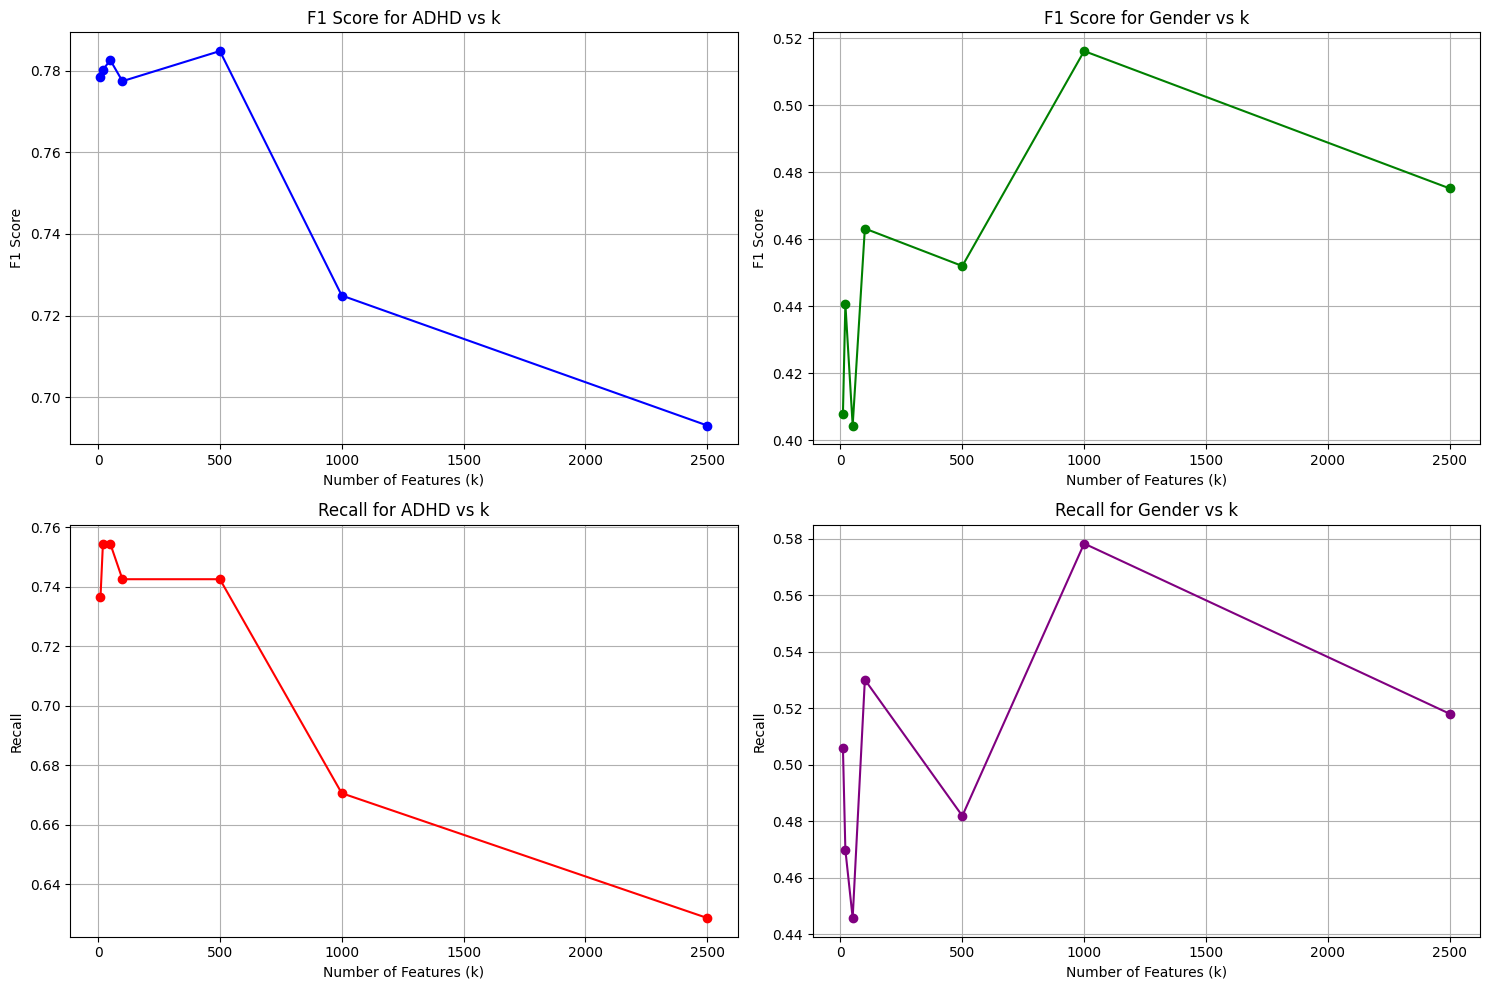

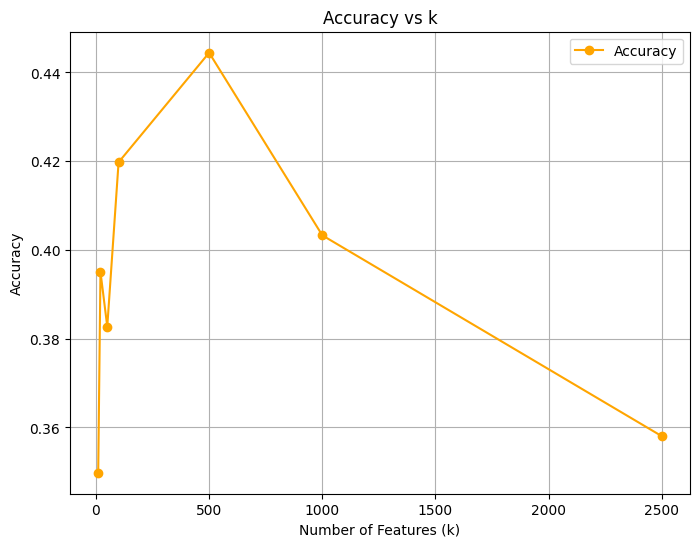

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, recall_score

# Store the metrics
k_values = [10, 20, 50, 100, 500, 1000, 2500]
accuracy_list = []
f1_adhd = []
f1_gender = []
recall_adhd = []
recall_gender = []

# Loop through each value of k
for k in k_values:
    print(f"Evaluating with k={k} features selected:")

    from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Define the list of k values to test
k_values = [10,20, 50,100,500,1000,2500]  # You can adjust these values as needed

# Loop through each value of k
for k in k_values:
    print(f"Evaluating with k={k} features selected:")

    # Step 1: Feature selection for ADHD and Gender targets separately with current k
    # Select best features for ADHD_Outcome
    selector_adhd = SelectKBest(score_func=f_classif, k=k)
    selector_adhd.fit(X_train_balanced, y_train_balanced["ADHD_Outcome"])
    adhd_indices = selector_adhd.get_support(indices=True)

    # Select best features for Sex_F
    selector_gender = SelectKBest(score_func=f_classif, k=k)
    selector_gender.fit(X_train_balanced, y_train_balanced["Sex_F"])
    gender_indices = selector_gender.get_support(indices=True)

    # Step 2: Combine and deduplicate indices from both targets (ADHD_Outcome and Sex_F)
    combined_indices = np.unique(np.concatenate([adhd_indices, gender_indices]))

    # Step 3: Apply selected features to train and test sets
    X_train_combined = X_train_balanced.iloc[:, combined_indices]
    X_test_combined = X_test.iloc[:, combined_indices]

    # Step 4: Initialize Random Forest Model with MultiOutputClassifier
    rf = RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        class_weight='balanced',
        random_state=42
    )

    # Create a MultiOutputClassifier with Random Forest
    multi_target_rf = MultiOutputClassifier(rf)

    # Fit the model using the balanced training set
    multi_target_rf.fit(X_train_combined, y_train_balanced)

    # Predict on the test set
    y_pred = multi_target_rf.predict(X_test_combined)

    # Accuracy on the test set (overall for both targets)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy on Test Set:", accuracy)

    # Print the classification report for both ADHD and Gender targets
    print("\nClassification Report for ADHD and Gender (Combined):")
    print(classification_report(y_test, y_pred))

    # Individual classification reports for each target
    y_pred_adhd = y_pred[:, 0]
    y_pred_gender = y_pred[:, 1]

    print("\nADHD Classification Report:")
    print(classification_report(y_test['ADHD_Outcome'], y_pred_adhd))

    print("\nGender Classification Report:")
    print(classification_report(y_test['Sex_F'], y_pred_gender))

    # Confusion Matrices for each target
    print("\nConfusion Matrix for ADHD Target:")
    print(confusion_matrix(y_test['ADHD_Outcome'], y_pred_adhd))

    print("\nConfusion Matrix for Gender Target:")
    print(confusion_matrix(y_test['Sex_F'], y_pred_gender))

    # Separator between different k values
    print("\n" + "-"*50 + "\n")


    # Compute F1 score and recall for ADHD and Gender
    f1_adhd.append(f1_score(y_test['ADHD_Outcome'], y_pred_adhd))
    f1_gender.append(f1_score(y_test['Sex_F'], y_pred_gender))

    recall_adhd.append(recall_score(y_test['ADHD_Outcome'], y_pred_adhd))
    recall_gender.append(recall_score(y_test['Sex_F'], y_pred_gender))

    # Compute accuracy
    accuracy_list.append(accuracy_score(y_test, y_pred))

# Plotting the F1 scores and Recall for each target class and accuracy vs k
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# F1 Score for ADHD
axes[0, 0].plot(k_values, f1_adhd, marker='o', label="F1 Score ADHD", color='blue')
axes[0, 0].set_title('F1 Score for ADHD vs k')
axes[0, 0].set_xlabel('Number of Features (k)')
axes[0, 0].set_ylabel('F1 Score')
axes[0, 0].grid(True)

# F1 Score for Gender
axes[0, 1].plot(k_values, f1_gender, marker='o', label="F1 Score Gender", color='green')
axes[0, 1].set_title('F1 Score for Gender vs k')
axes[0, 1].set_xlabel('Number of Features (k)')
axes[0, 1].set_ylabel('F1 Score')
axes[0, 1].grid(True)

# Recall for ADHD
axes[1, 0].plot(k_values, recall_adhd, marker='o', label="Recall ADHD", color='red')
axes[1, 0].set_title('Recall for ADHD vs k')
axes[1, 0].set_xlabel('Number of Features (k)')
axes[1, 0].set_ylabel('Recall')
axes[1, 0].grid(True)

# Recall for Gender
axes[1, 1].plot(k_values, recall_gender, marker='o', label="Recall Gender", color='purple')
axes[1, 1].set_title('Recall for Gender vs k')
axes[1, 1].set_xlabel('Number of Features (k)')
axes[1, 1].set_ylabel('Recall')
axes[1, 1].grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()

# Accuracy vs k
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracy_list, marker='o', color='orange', label="Accuracy")
plt.title('Accuracy vs k')
plt.xlabel('Number of Features (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
#We will now start to implement PCA and try to see if has any benefits for the model.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Assuming you already have your data (X, y) prepared
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Reset index to ensure proper alignment
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Combine target columns into one combined group label
y_train_combined = y_train.copy()
y_train_combined['group'] = y_train_combined['Sex_F'].astype(str) + '_' + y_train_combined['ADHD_Outcome'].astype(str)

# Get the minimum class count for balanced sampling
min_count = y_train_combined['group'].value_counts().min()

# Perform stratified sampling to ensure equal distribution across each combined label
balanced_indices = (
    y_train_combined.groupby('group', group_keys=False)
    .apply(lambda x: x.sample(n=min_count, random_state=42))
    .index
)

# Print the number of samples in each group after balancing
print("Balanced group counts:")
print(y_train_combined.loc[balanced_indices, 'group'].value_counts())

# Subset the data based on the sampled indices
X_train_balanced = X_train.loc[balanced_indices].reset_index(drop=True)
y_train_balanced = y_train.loc[balanced_indices].reset_index(drop=True)

# Initialize Random Forest Classifier with balanced class weights
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight='balanced',  # This handles the imbalance in the target classes
    random_state=42
)

# Initialize MultiOutputClassifier to predict both targets (ADHD_Outcome and Sex_F)
multi_rf = MultiOutputClassifier(rf)

# Loop over different values for n_components in PCA
for n in [10,20,50,95]:  # You can adjust this list as needed
    print(f"Testing PCA with n_components = {n}")

    # Apply PCA to the training and test data
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_balanced)
    X_test_pca = pca.transform(X_test)

    # Fit the MultiOutputClassifier on the transformed training data
    multi_rf.fit(X_train_pca, y_train_balanced)

    # Make predictions on the transformed test data
    y_pred = multi_rf.predict(X_test_pca)

    # Print classification report for ADHD_Outcome
    print("Classification Report for ADHD_Outcome:")
    print(classification_report(y_test['ADHD_Outcome'], y_pred[:, 0]))

    # Print classification report for Sex_F
    print("\nClassification Report for Sex_F:")
    print(classification_report(y_test['Sex_F'], y_pred[:, 1]))

    # Print a separator for clarity
    print("-" * 50)


<ipython-input-76-95c3fec7d1cb>:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min_count, random_state=42))


Balanced group counts:
group
0_0    117
0_1    117
1_0    117
1_1    117
Name: count, dtype: int64
Testing PCA with n_components = 10
Classification Report for ADHD_Outcome:
              precision    recall  f1-score   support

           0       0.33      0.47      0.39       121
           1       0.67      0.53      0.59       243

    accuracy                           0.51       364
   macro avg       0.50      0.50      0.49       364
weighted avg       0.56      0.51      0.52       364


Classification Report for Sex_F:
              precision    recall  f1-score   support

           0       0.76      0.62      0.69       254
           1       0.39      0.55      0.46       110

    accuracy                           0.60       364
   macro avg       0.58      0.59      0.57       364
weighted avg       0.65      0.60      0.62       364

--------------------------------------------------
Testing PCA with n_components = 20
Classification Report for ADHD_Outcome:
            

In [ ]:
# PCA didn't improve performance for the following reasons:
#With different values for n_components (10, 20, 50, 95), accuracy, precision, recall, and F1-score either decreased or stayed similar.
#PCA reduces dimensions by creating new features that are combinations of the original ones, which can lose important information for classification.
#Random Forest models are already good at handling high-dimensional data without needing PCA. The dimensionality reduction may have removed useful signals.